# Выпускной проект: "Метанпромбанк" - Анализ оттока клиентов

Ссылка на презентацию: https://disk.yandex.ru/i/NcyIc6DPqy_eAQ

**Заказчик**

Отдел маркетинга "Метанпромбанка"

**Цель проекта**

Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.

**Ход исследования**

* Загрузка данных;
* Предобработка данных;
* Исследовательский анализ данных (EDA);
* Проверка гипотез;
* Подведение промежуточных итогов;
* Сегментирование клиентов;
* Приоритизация сегментов;
* Выводы и рекомендации.


# План работы


# 1. Загрузка данных

- выгрузить необходимые библеотеки для работы;
- считать CSV-файл с данными с помощью библиотеки pandas и сохранить их в датафрейм;
- вывести первые строки набора данных;
- посмотреть, какие есть столбцы и какого они типа;
- написать вывод по разделу.
  

# 2. Предобработка данных

- заменить названия столбцов (привести к нижнему регистру);
- преобразовать данные в нужные типы;
- обработать пропуски при необходимости;
- написать вывод по разделу.

  
  
# 3. Исследовательский анализ данных (EDA)

- анализ распределения признаков, в том числе оттока (непрерывные - ищем отточные интервалы, категориальные/дискретные - ищем значения признаков с оттоком выше, чем по банку); 
- корреляционный анализ(в том числе интерпретация);
- написать вывод по разделу.


# 4. Проверка гипотез

- посчитать статистическую значимость различий в среднем доходе заказа между между теми клиентами, которые ушли и теми, которые остались;
- проверить еще одну гипотезу из исследуеммых данных;
- написать вывод по разделу.


# 5. Подведение промежуточных итогов

- для создания портрета клиента с высоким оттоком и дальнейшего их сегментировния выделить основные признаки с высоким оттоком 

 
  
# 6. Сегментирование клиентов 

- сегментация (минимум по трем признакм и от 500 клиентов на сегмент); отток выше, чем средний уровень оттока по банку;
- написать вывод по разделу.

 
 
# 8. Приоритизация сегментов 

- Необходимо приоритизировать сегменты, чтобы маркетинг знал, на что обратить внимание в первую очередь в случае, если ресурсов маркетинга не хватит на охват всех выделенных сегментов. 
  

 

# 9. Написать общий вывод и рекомендации

  

### Загрузка данных и подготовка их к анализу

Выгрузим необходимые библеотеки

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns
import math as mth
!pip install phik
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

     |████████████████████████████████| 686 kB 1.9 MB/s eta 0:00:01


In [2]:
# Улучшим четкость будущих графиков
%config InlineBackend.figure_format = 'retina'
# для корректного отображения больших значений
pd.options.display.float_format = '{:.0f}'.format

Выгрузим датафрейм

In [3]:
#открываем и сохраняем как датафрейм файл с данными:
try:
    # локальная работа
    df = pd.read_csv('bank_dataset.csv')  
except:
    # для работы онлайн или отправки 
    df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

# **Описание данных**
 
Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

Файл `/datasets/bank_scrooge.csv`.
* **USERID** — идентификатор пользователя,
* **score** — баллы кредитного скоринга,
* **city** — город,
* **gender** — пол,
* **age** — возраст,
* **equity** — количество баллов собственности
* **balance** — баланс на счёте,
* **roducts** — количество продуктов, которыми пользуется клиент,
* **credit_card** — есть ли кредитная карта,
* **last_activity** — активный клиент,
* **EST_SALARY** — оценочный доход клиента,
* **сhurn** — признак оттока.





Создадим функцию для вызова общей информации по датафрему:

In [4]:
def total_info_csv(dataframe):
    print('Первые 10 строк датафрейма')
    display(dataframe.head(10))
    print()
    print()
    print('Общая информация по датафрейму')
    print()
    print(dataframe.info(10))
    print()
    print()
    print('Выведем описательную статистику по датафрейму')
    print()
    print(dataframe.describe())
    print()
    print('Найдено дубликатов в датафрейме:', dataframe.duplicated().sum())
    print()

Выведем общюю информацию по датафрейму `df`.

In [5]:
total_info_csv(df)

Первые 10 строк датафрейма


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850,Рыбинск,Ж,25,1,59215,2,0,1,75719,1
1,146556,861,Рыбинск,Ж,37,5,850594,3,1,0,86622,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683,0
3,225363,866,Ярославль,Ж,51,5,1524746,2,0,1,174424,1
4,157978,730,Ярославль,М,34,5,174,1,1,0,67353,1
5,202305,856,Рыбинск,М,56,4,863687,3,1,0,156620,0
6,177259,807,Ярославль,Ж,39,3,405042,3,0,1,103838,0
7,218868,825,Ярославль,Ж,38,4,458145,2,1,1,68085,0
8,211686,923,Ярославль,М,54,5,1206338,2,1,0,155372,0
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,238056,0




Общая информация по датафрейму

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None


Выведем описательную статистику по датафрейму

       USERID  score  age  equity   balance  products  credit_card  \
count   10000  10000 9974   10000      7705     10000 

**Вывод**

- выгрузили необходимые библеотеки для работы;
- считали CSV-файл с данными и сохранили его в датафрейм;
- необходимо заменить названия столбцов на более подходящие;
- требуется замена типа данных;
- дубликаты не обнаружены;
- имеются пропуски.

### Предобработка данных

Приведем название столбцов к нижнему регистру.

In [6]:
df.columns = df.columns.str.lower()

Переименуем столбцы

In [7]:
df.rename(columns={'userid':'user_id'}, inplace=True)

Проверяем пропуски в столбце 'age'

In [8]:
print('Количество пропусков в столбце:', df['age'].isna().sum())
age_p = round((df['age'].isna().sum()/df['user_id'].count())*100, 2)
print('Доля пропусков в столбце age составляет:', age_p, '%')

Количество пропусков в столбце: 26
Доля пропусков в столбце age составляет: 0.26 %


Перед обработкой пропусков обязательно стоит выяснить, к какому типу они относятся, а также как эти пропуски зависят от имеющихся данных.

Для этого создадим новый признак, принимающий 1, если в наблюдении пропущено значение признака, и 0, если в наблюдении значение признака не пропущено

In [9]:
df['age_isna'] = df['age'].apply(lambda x: 1 if pd.isna(x) else 0)

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable user_id is large: 9927. Are you sure this is not an interval variable? Analysis for pairs of variables including user_id can be slow.
  warnings.warn(


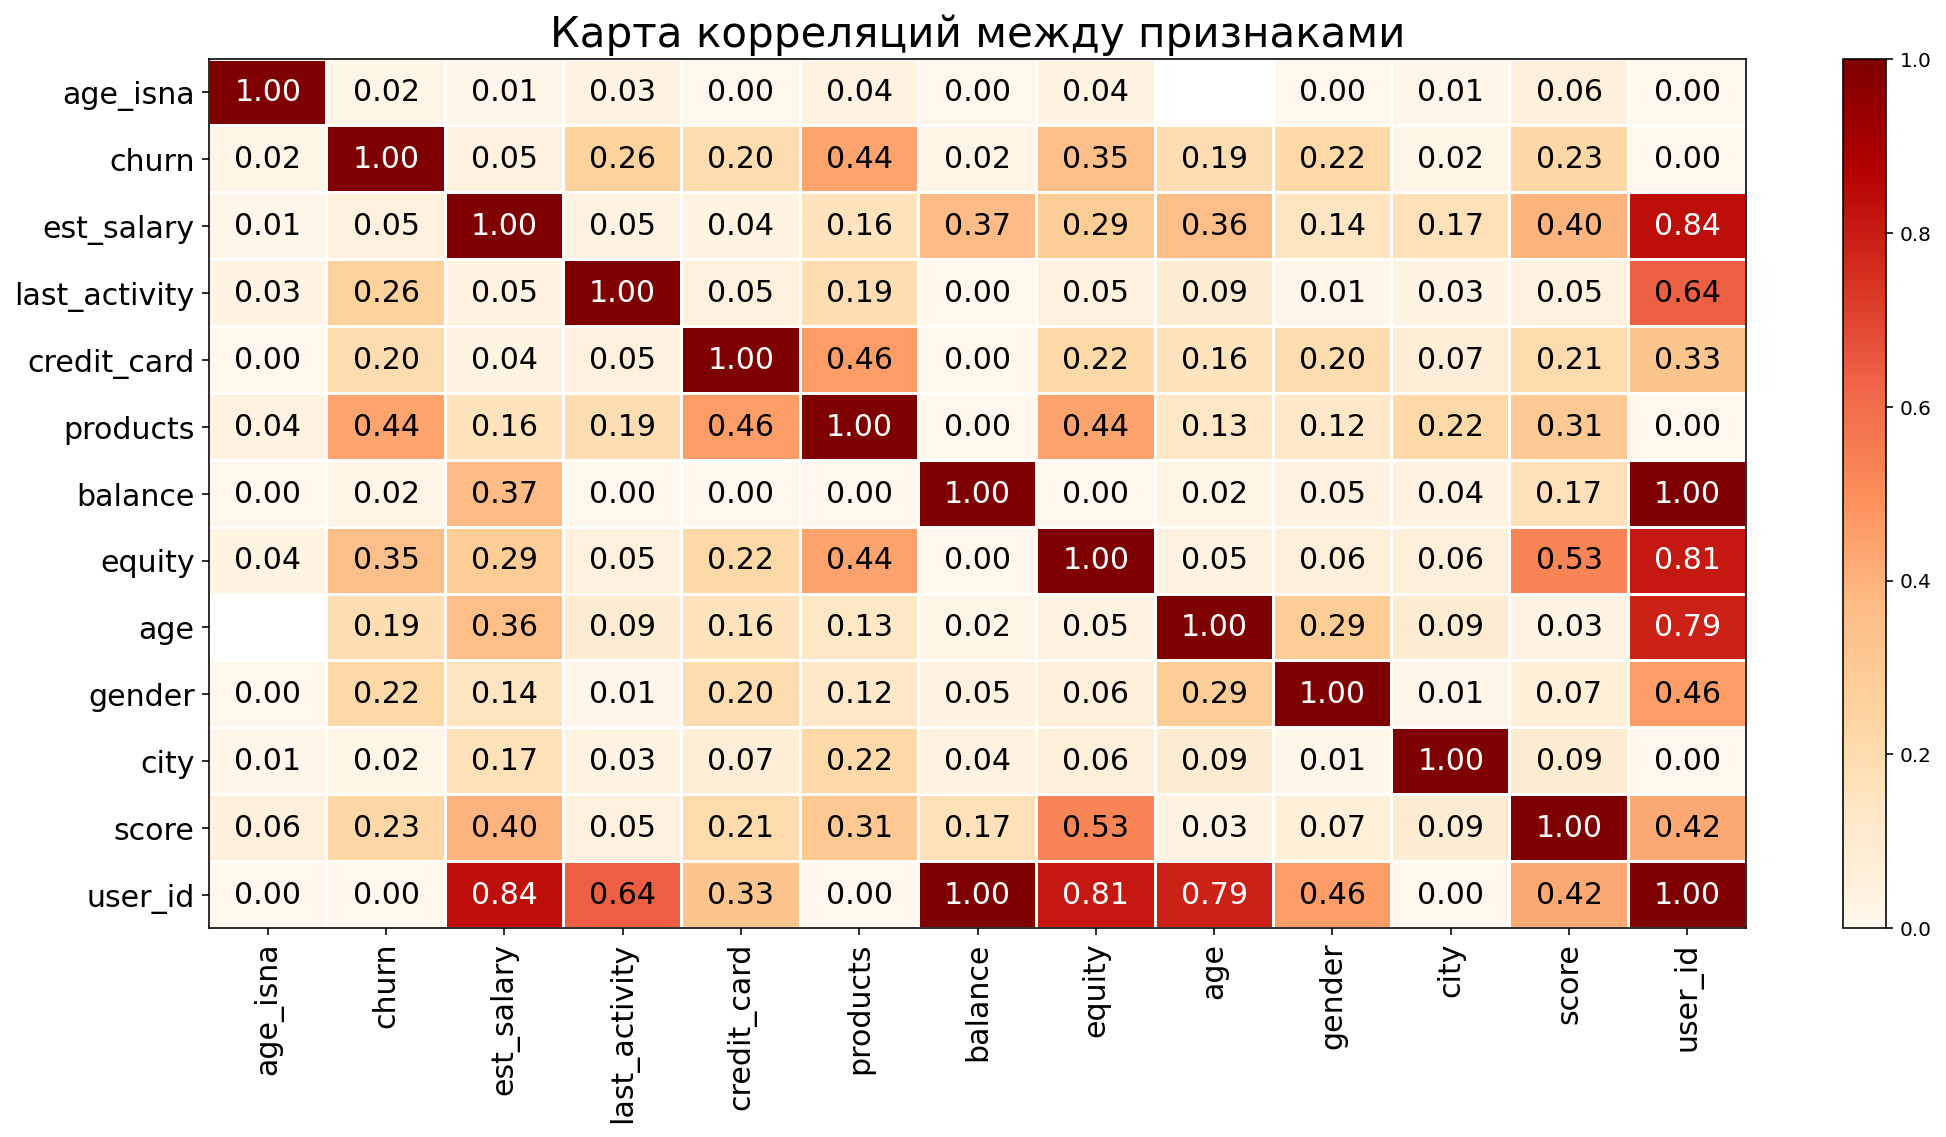

In [10]:
# создадим переменную с таблицей корреляций
phik_age = df.phik_matrix(interval_cols=['score','balance', 'est_salary', 'age']) #указать колонки с непрерывными признаками
# визуализируем корреляционную матрицу для наглядности
graph_age_isna = plot_correlation_matrix(phik_age.values, 
                        x_labels=phik_age.columns, 
                        y_labels=phik_age.index, 
                        vmin=0, vmax=1, color_map="OrRd",  #указать цвет
                        title='Карта корреляций между признаками', 
                        fontsize_factor=1.5, 
                        figsize=(15, 8))
plt.tight_layout()

* Пропуски по `age` относятся к MCAR (Missing Completely At Random / Отсутствует совершенно случайно). 
* Заменить какими либо значениями данный столбец мы не можем, а так как доля пропусков слишком мала, то логично будет от них избавиться

In [11]:
df = df.dropna(subset=['age'])
# также удалим не нужный уже не нужный признак age_isna
df = df.drop('age_isna', axis=1)

In [12]:
print('Количество пропусков в столбце:', df['age'].isna().sum())

Количество пропусков в столбце: 0


Проверяем пропуски в столбце 'balance'

In [13]:
print('Количество пропусков в столбце:', df['balance'].isna().sum())
balance_p = round((df['balance'].isna().sum()/df['user_id'].count())*100, 2)
print('Доля пропусков в столбце balance составляет:', balance_p, '%')

Количество пропусков в столбце: 2279
Доля пропусков в столбце balance составляет: 22.85 %


Доля пропусков в столбце довольно высокая, удалять строки нельзя, проверим есть ли строки с нулевым балансом, можно предположить, что пропуски связанны с нулевым балансом 

In [14]:
display(df.query('balance == 0'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730,Ярославль,М,18,0,0,2,1,1,64548,0
6757,148456,813,Ярославль,М,20,2,0,2,1,0,23877,0


Имеются строки с нулевым балансом, значит причина в другом, проверим связаны ли пропуски от оттока клиента

In [15]:
#группируем строки с пропусками по значениям оттока
print(df.query('balance.isna()').groupby('churn')['churn'].count())

churn
0    2266
1      13
Name: churn, dtype: int64


Определенно связать пропуски с оттоком клиентов нельзя, посмотрим на распределение по количеству используемых продуктов

In [16]:
#группируем строки с пропусками по значениям количества используемых продуктов
print(df.query('balance.isna()').groupby('products')['products'].count())

products
0       1
1    1934
2     315
3      29
Name: products, dtype: int64


Большая часть клиентов с пропусками пользователи одного продукта, возможно они являются в основном держателями кредитных карт, проверим предположение

In [17]:
#группируем строки с пропусками по значению количества используемых кредитных карт
print(df.query('balance.isna()').groupby('credit_card')['credit_card'].count())

credit_card
0     421
1    1858
Name: credit_card, dtype: int64


Предположение подтвердилось, клиенты с пропусками  в основном являются держателями кредитных карт, а для владения кредитной карты не обязательно заводить дебетовую карту, поэтому и данных по балансу у таких клиентов нет, возможно другие продукты которыми пользуются эти клиенты также не требуют заведения дебетовой карты и следовательно данные по балансу у таких клиентов также отсутсвуют.

Также выясним, к какому типу они относятся, а также как эти пропуски зависят от имеющихся данных.

Для этого создадим новый признак, принимающий 1, если в наблюдении пропущено значение признака, и 0, если в наблюдении значение признака не пропущено

In [18]:
df['balance_isna'] = df['balance'].apply(lambda x: 1 if pd.isna(x) else 0)

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable user_id is large: 9924. Are you sure this is not an interval variable? Analysis for pairs of variables including user_id can be slow.
  warnings.warn(


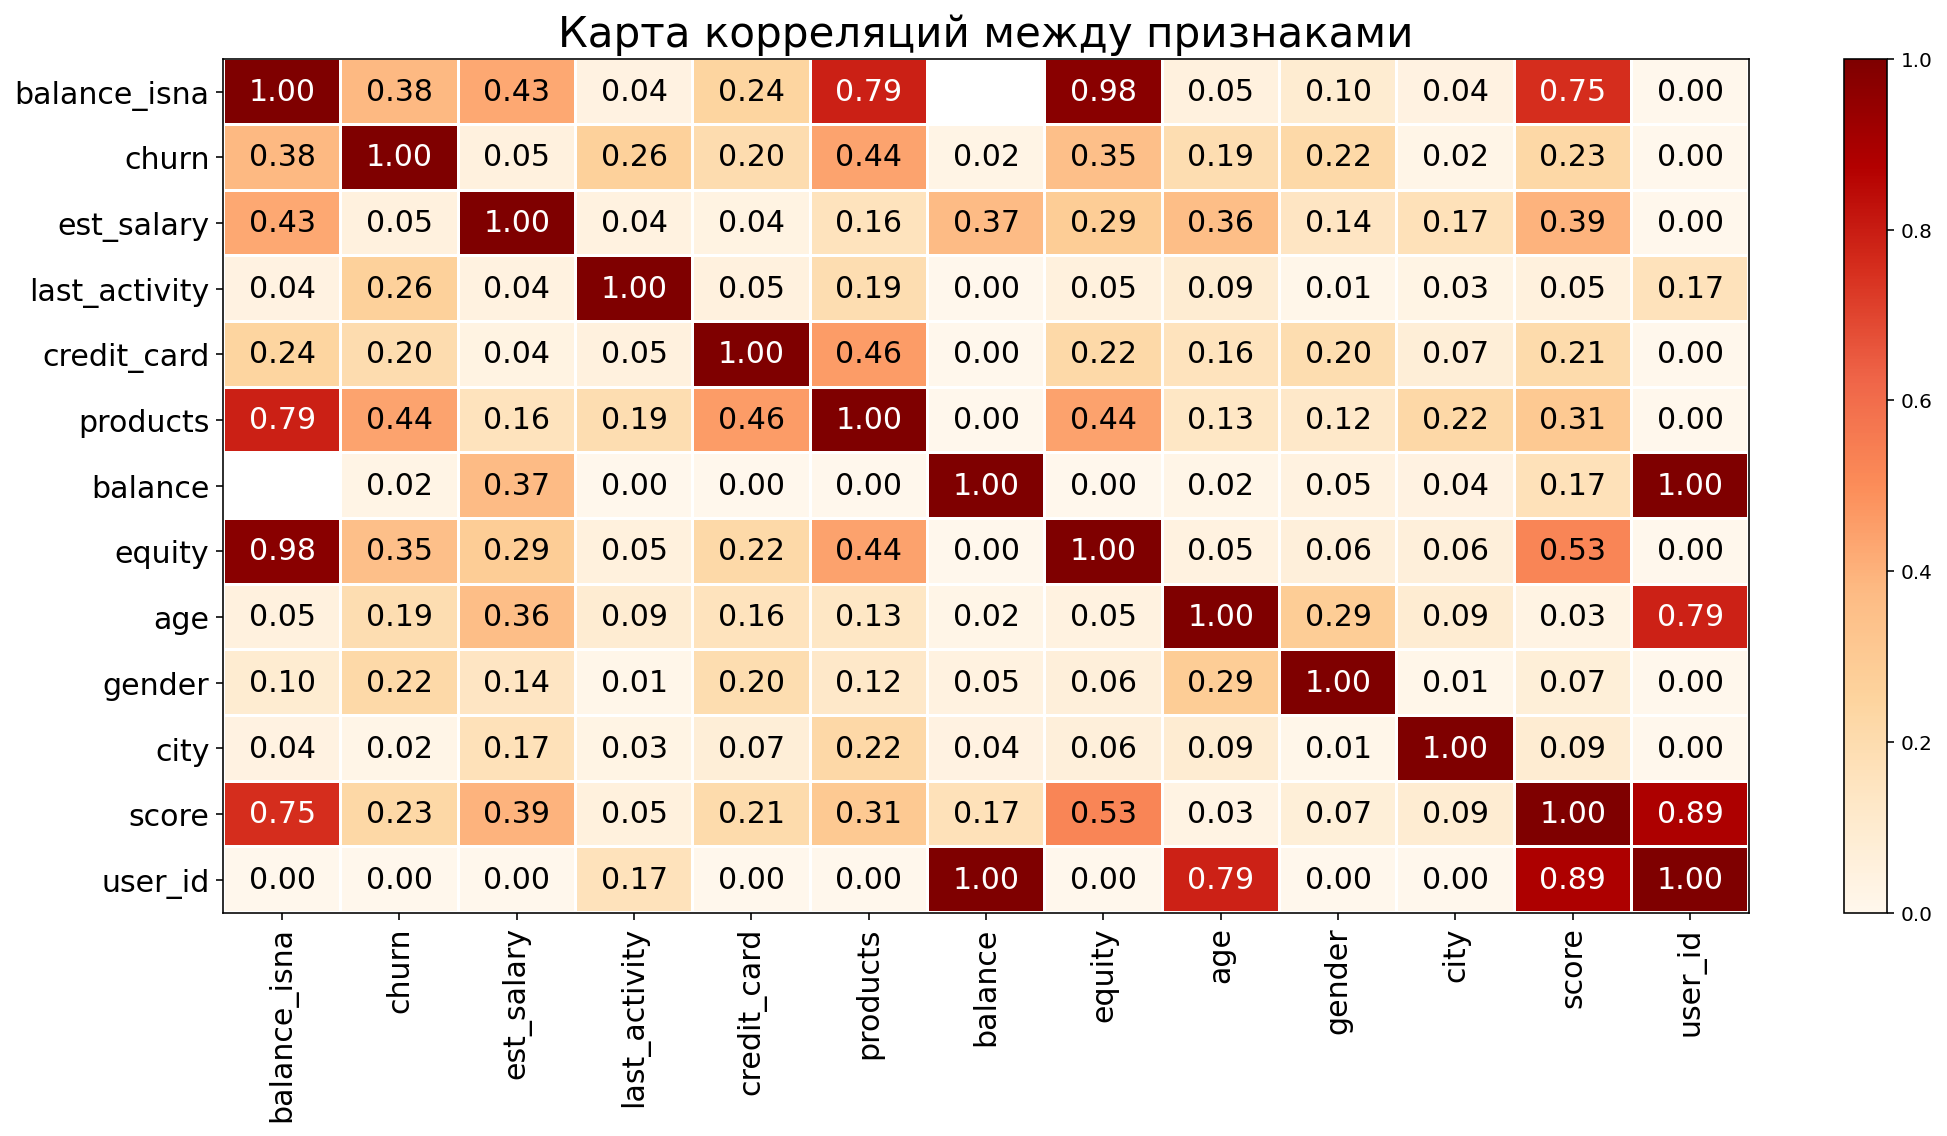

In [19]:
# создадим переменную с таблицей корреляций
phik_balance = df.phik_matrix(interval_cols=['score','balance', 'est_salary', 'age']) #указать колонки с непрерывными признаками
# визуализируем корреляционную матрицу для наглядности
graph_age_isna = plot_correlation_matrix(phik_balance.values, 
                        x_labels=phik_balance.columns, 
                        y_labels=phik_balance.index, 
                        vmin=0, vmax=1, color_map="OrRd",  #указать цвет
                        title='Карта корреляций между признаками', 
                        fontsize_factor=1.5, 
                        figsize=(15, 8))
plt.tight_layout()

Пропуски по `balance` относяться к MNAR (Missing Not At Random / Отсутствует не случайно), зависят сильно от других столбцов, пропуски нельзя отбросить или чем-то заполнить. 

In [20]:
# также удалим не нужный уже не нужный признак balance_isna
df = df.drop('balance_isna', axis=1)

Поменяем тип данных в столбцах `score` и `age` на целочисленный, так как в данных столбцах все чила целые

In [21]:
df[['score', 'age']] = df[['score', 'age']].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1013.0+ KB


Проверим на неявные дубликаты столбцы `city` и `gender`

In [23]:
print(df['city'].unique())
print(df['gender'].unique())

['Рыбинск' 'Ярославль' 'Ростов']
['Ж' 'М']


Неявных дубликатов не выявленно

Проверим на неявные дубликаты столбец `user_id`

In [24]:
print('Неявных дубликатов выявлено:', df['user_id'].duplicated().sum())

Неявных дубликатов выявлено: 50


Проверим дубликаты `user_id` по нескольким столбцам

In [25]:
# создадим для этого функцию
def dupl_user_id (dataframe):
    # пройдемся по каждому столбцу в датафрейме
    for name, values in dataframe.iteritems ():
        # выведем разультат найденных дубликатов на экран для каждой пары для user_id
        print('Дубликатов по столбцам (user_id -', name, ') найдено:', 
              dataframe.duplicated(subset=['user_id', name], keep='first').sum())

dupl_user_id (df)

Дубликатов по столбцам (user_id - user_id ) найдено: 50
Дубликатов по столбцам (user_id - score ) найдено: 0
Дубликатов по столбцам (user_id - city ) найдено: 0
Дубликатов по столбцам (user_id - gender ) найдено: 18
Дубликатов по столбцам (user_id - age ) найдено: 5
Дубликатов по столбцам (user_id - equity ) найдено: 9
Дубликатов по столбцам (user_id - balance ) найдено: 0
Дубликатов по столбцам (user_id - products ) найдено: 11
Дубликатов по столбцам (user_id - credit_card ) найдено: 25
Дубликатов по столбцам (user_id - last_activity ) найдено: 25
Дубликатов по столбцам (user_id - est_salary ) найдено: 0
Дубликатов по столбцам (user_id - churn ) найдено: 0


Скорее всего это разные пользователи (т.к. они из разных городов).

Попробуем выявить клиента который дублируется

In [26]:
print('Клиенты которые дублируются найдено:', 
      df.duplicated(subset=['user_id', 'city', 'gender', 'age'], keep='first').sum())

Клиенты которые дублируются найдено: 0


Это абсолютно разные клиенты, видимо из-за того, что разные филиалы и возникли эти дубликаты по user_id, оставим выявленные дубликаты.

При обработке датафрейма была замечена одна особенность, а именно наличие у клиента статуса активного и одновременно ушедшего, проверим сколько таких клиентов в данных

In [27]:
display(df.query('last_activity == 1 and churn == 1'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25,1,59215,2,0,1,75719,1
3,225363,866,Ярославль,Ж,51,5,1524746,2,0,1,174424,1
12,132970,845,Ярославль,Ж,31,3,591929,2,1,1,112697,1
54,210764,748,Рыбинск,М,46,2,182890,1,1,1,74009,1
58,164676,860,Ярославль,М,37,5,648594,2,1,1,213587,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9965,165238,839,Ярославль,Ж,40,3,499865,2,1,1,212305,1
9977,158143,807,Ростов,М,43,4,1124809,1,1,1,185231,1
9978,218170,841,Ярославль,М,29,2,235287,2,1,1,137494,1
9981,154871,892,Рыбинск,М,39,5,636288,2,0,1,227288,1


В целом это доказывает несовершенство системы, можно предположить, что last_activity - это наличие операций за какой-то промежуток времени и клиент приобретает новый статус как неактивного в строго после какого-то промежутка времени, а churn - отсутствие активного договора на какой-либо продукт или обслуживания, это событие может возникнуть после окончания или разрыва договорных отношений, а правки в связи с изменением статуса клиента как ушедшего не вносятся в last_activity как неактивного. 

**Вывод**
- привели название столбцов к нижнему регистру, также переименовали столбец c id клиентов для читабельности столбца;
- удалили 26 выявленных пропусков в столбце `age` так как их доля составляет 0,26%, пропуски относятся к MCAR (Missing Completely At Random / Отсутствует совершенно случайно), а заполнять пропуски какими либо значениями не корректно;
- выявили 2279 с долей 22,8% пропусков в столбце `balance`, они относяться к MNAR (Missing Not At Random / Отсутствует не случайно), зависят сильно от других столбцов, пропуски нельзя отбросить или чем-то заполнить. 
- поменяли тип данных в столбцах `score` и `age` на целочисленный, так как в данных столбцах все чила целые;
- выявили 50 неявных дубликатов в столбце `user_id`, выяснилось, что это разные клиенты, видимо из-за того, что разные филиалы и возникли эти дубликаты, оставили выявленные дубликаты;
- выявили пересечение клиентов в статусах как активного клиента и одновременно ушедшего из банка, связанно это с несовершенством системы.

### Исследовательский анализ данных (EDA)

Для анализа распределения по непрерывным признакам создадим функцию для постройки графиков

In [28]:
def graph_nepr (dataframe):
    for column in ['score','balance', 'est_salary']:
        # создадим переменные без выбросов для ограничения оси x
        x_95 = dataframe[column].quantile (.95)
        x_5 = dataframe[column].quantile (.05)
        # зададим размер
        plt.figure(figsize=(15, 7))
        # выведем график по заданным параметрам 
        sns.histplot(
        dataframe, x=column, hue='churn', kde=True, element="step",
        stat='density', common_norm=False,
        )
        # добавим шапу с названием графика
        plt.title(f"Распределение ушедших и не ушедших клиентов по '{column}'")
        # переименуем название оси y
        plt.ylabel('Объем клиентов')
        # поставим ограничение по оси х для избавления от выбросов
        plt.xlim(x_5, x_95)
        plt.ticklabel_format(useOffset = False)

Выведем графики распределения ушедших и не ушедших клиентов по признакам

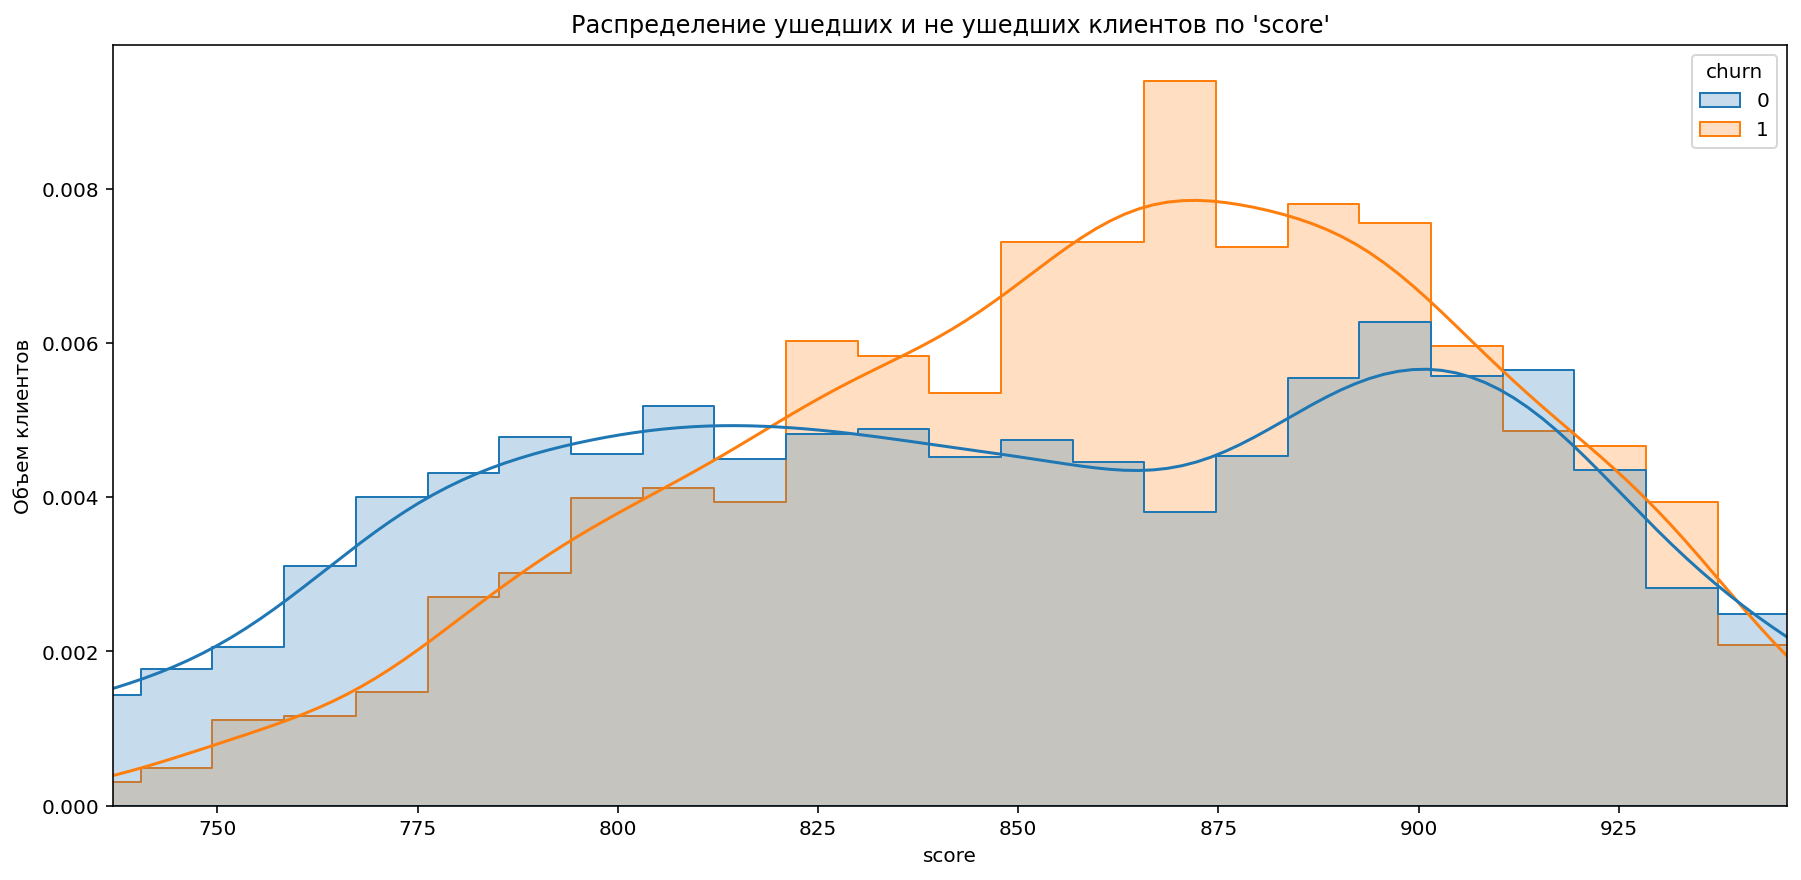

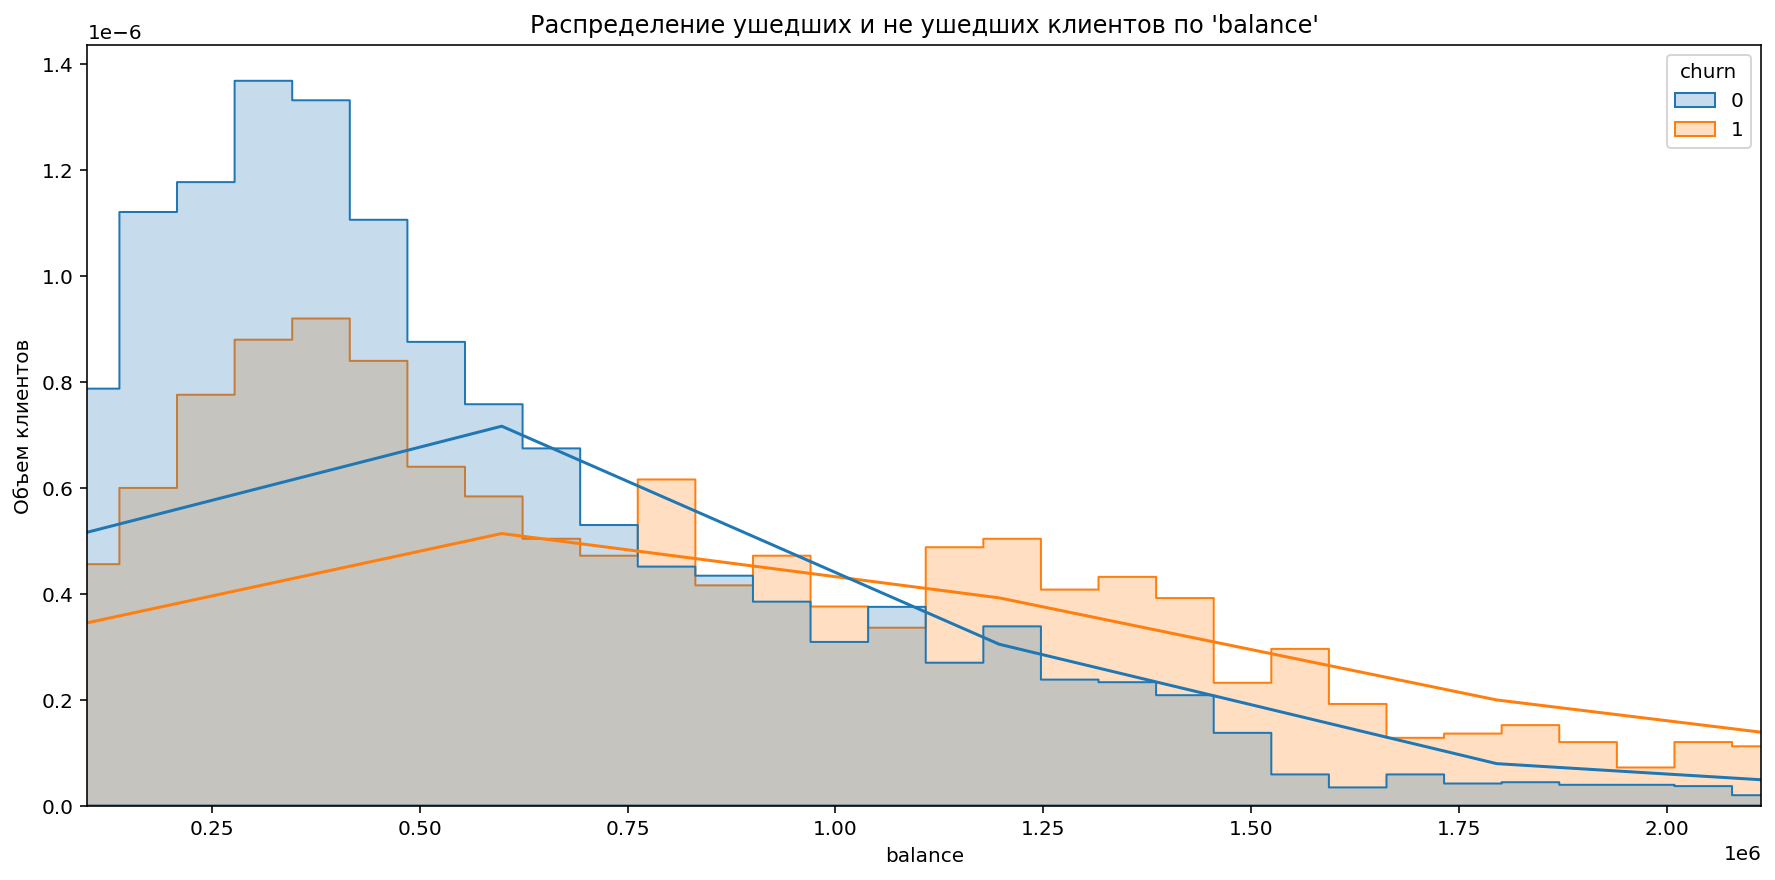

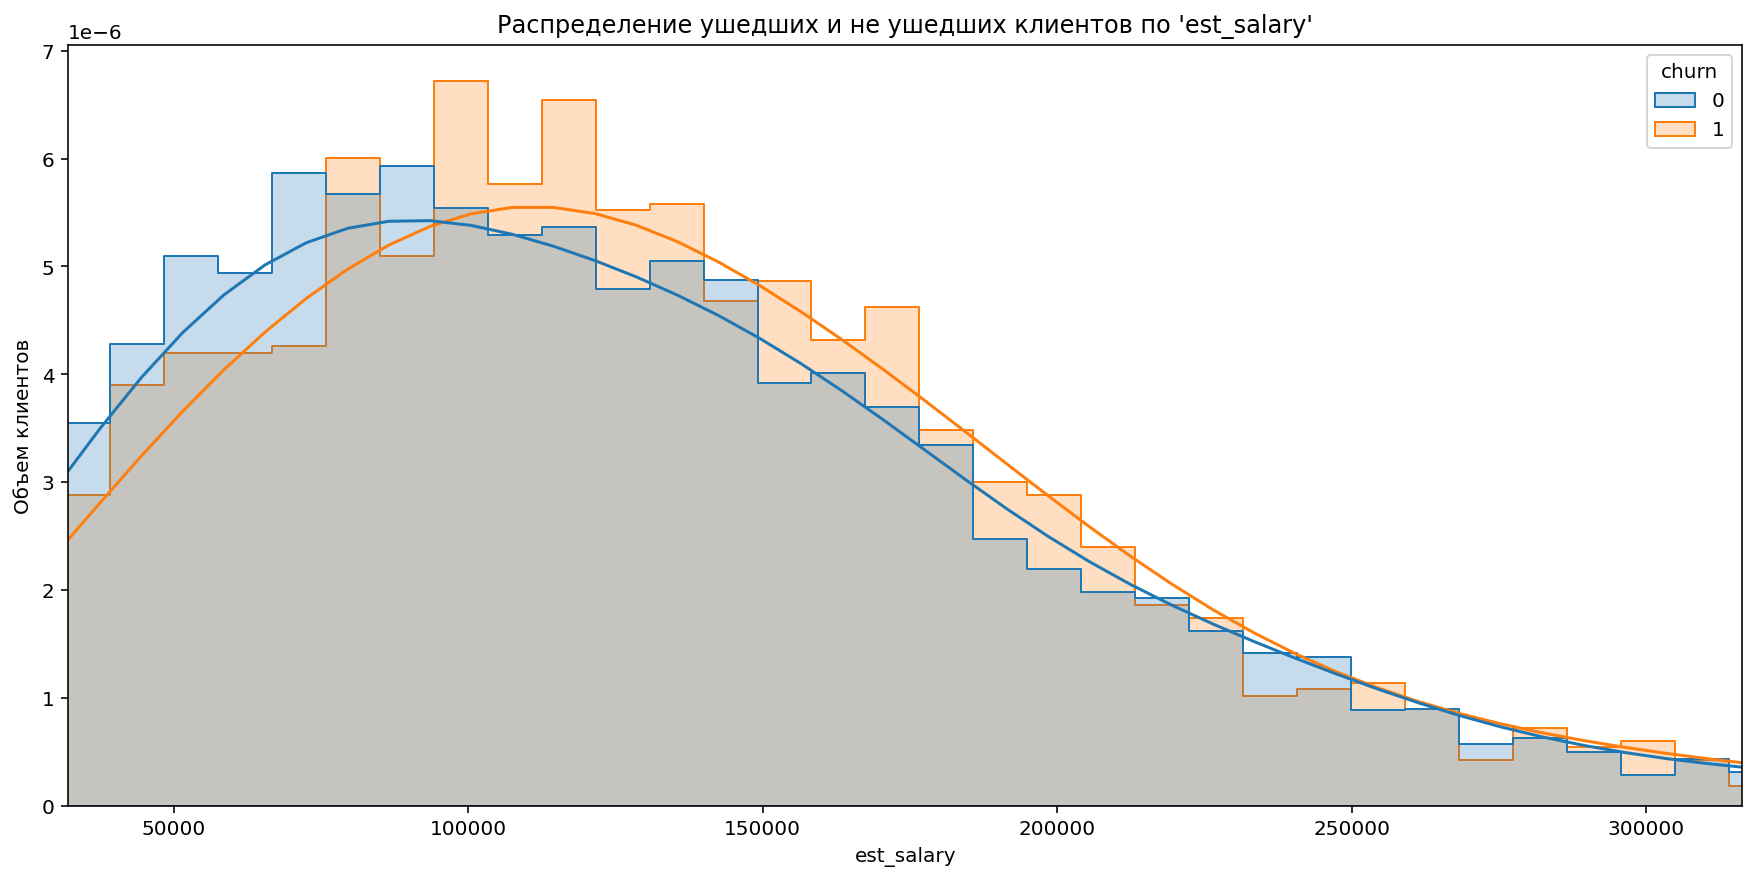

In [29]:
graph_nepr (df)

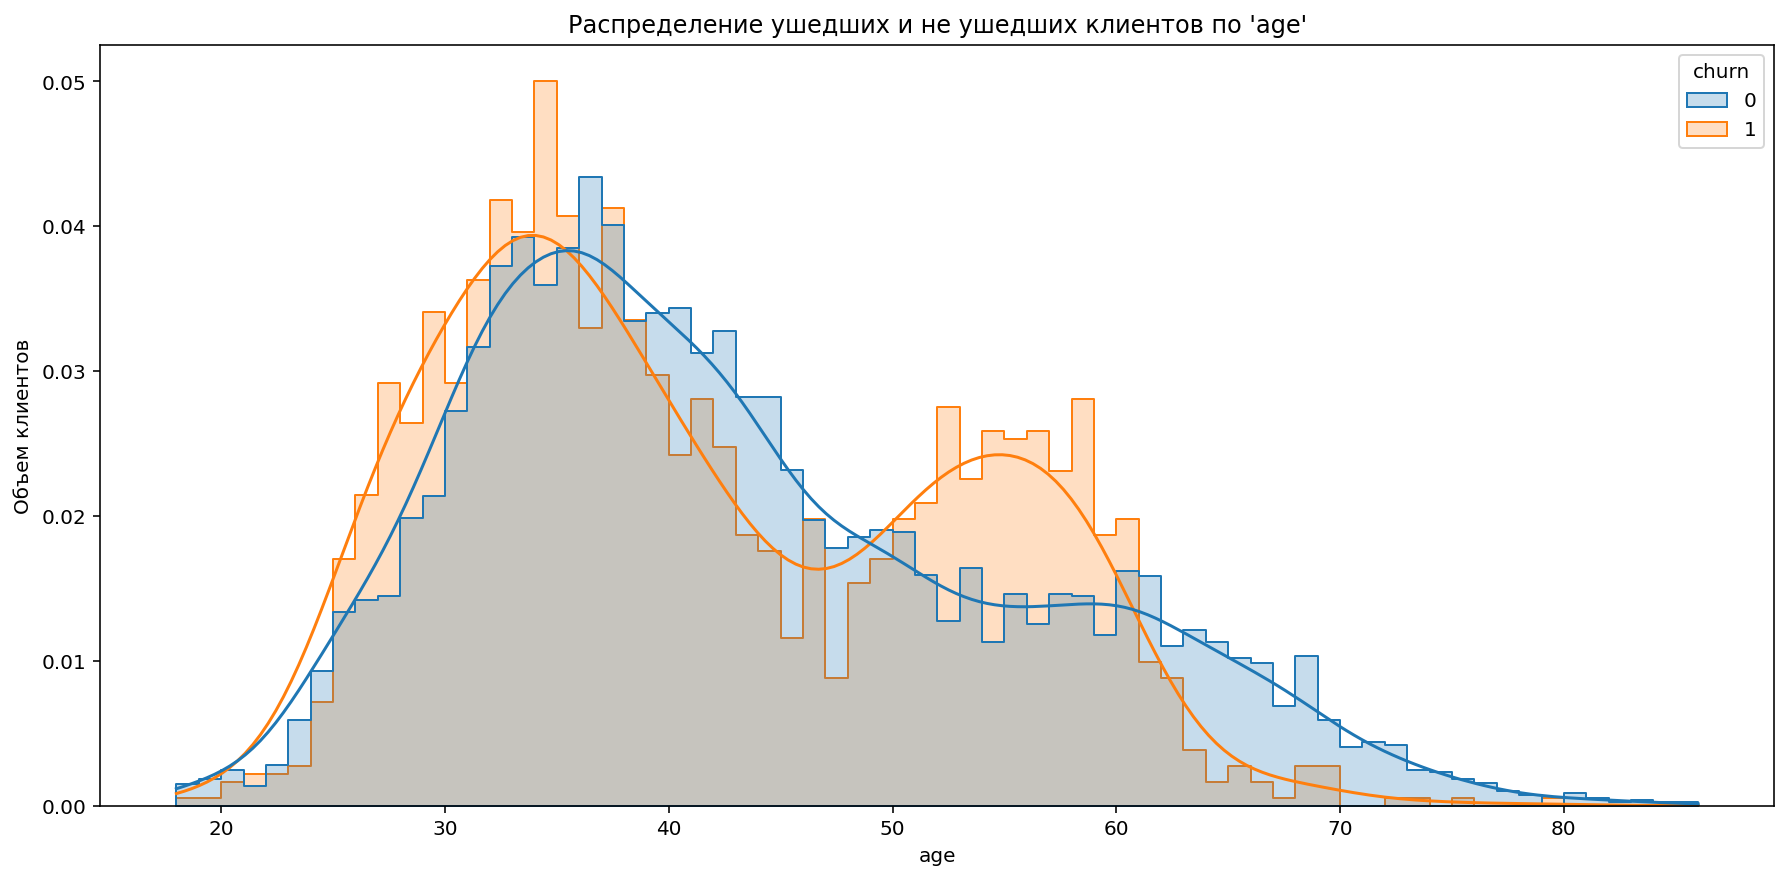

In [30]:
plt.figure(figsize=(15, 7))
# выведем график по заданным параметрам 
sns.histplot(
df, x='age', hue='churn', kde=True, binwidth=1, element="step",
stat='density', common_norm=False,
)
# добавим шапу с названием графика
plt.title(f"Распределение ушедших и не ушедших клиентов по 'age'")
# переименуем название оси y
plt.ylabel('Объем клиентов')
plt.ticklabel_format(useOffset = False)

- В разрезе балов видно, что отток клиентов выше чем их удержание на диапазоне баллов 820-900. 
- В разрезе баланса видно, что отток клиентов выше чем их удержание на диапазоне баланса на счете от 1 000 000.
- В разрезе оценочного дохода клиента видно, что отток клиентов выше чем их удержание на диапазонах оценочного дохода клиента 100 000 - 140 000 и 150 000 - 220 000.
- В разрезе возраста можно выделить две группы это 25-35 лет и 50-60 лет с повышенным оттоком.

Для анализа распределения по категориальным/дискретным признакам создадим функцию для постройки графиков

In [31]:
def graph_kat (dataframe, hue=None):
    for column in ['city','gender', 'equity', 'products', 'credit_card', 'last_activity']:
        # зададим размер
        plt.figure(figsize=(15, 7))
        # выведем график по заданным параметрам и отсортируем по убыванию
        sns.barplot(data=dataframe, x=column, y='churn', hue=None, alpha=0.7,
                   order=dataframe.groupby(column)['churn'].mean().sort_values(ascending=False).index)
        # выведем линию среднего оттока клиентов по датафрейму
        plt.axhline(y=dataframe['churn'].mean(), color='red', linestyle='--')
        plt.title(f"Распределение среднего уровня оттока по '{column}'")
        # переименуем название оси y
        plt.ylabel('Средний уровень оттока')

Выведем график распределение среднего оттока клиентов по признакам

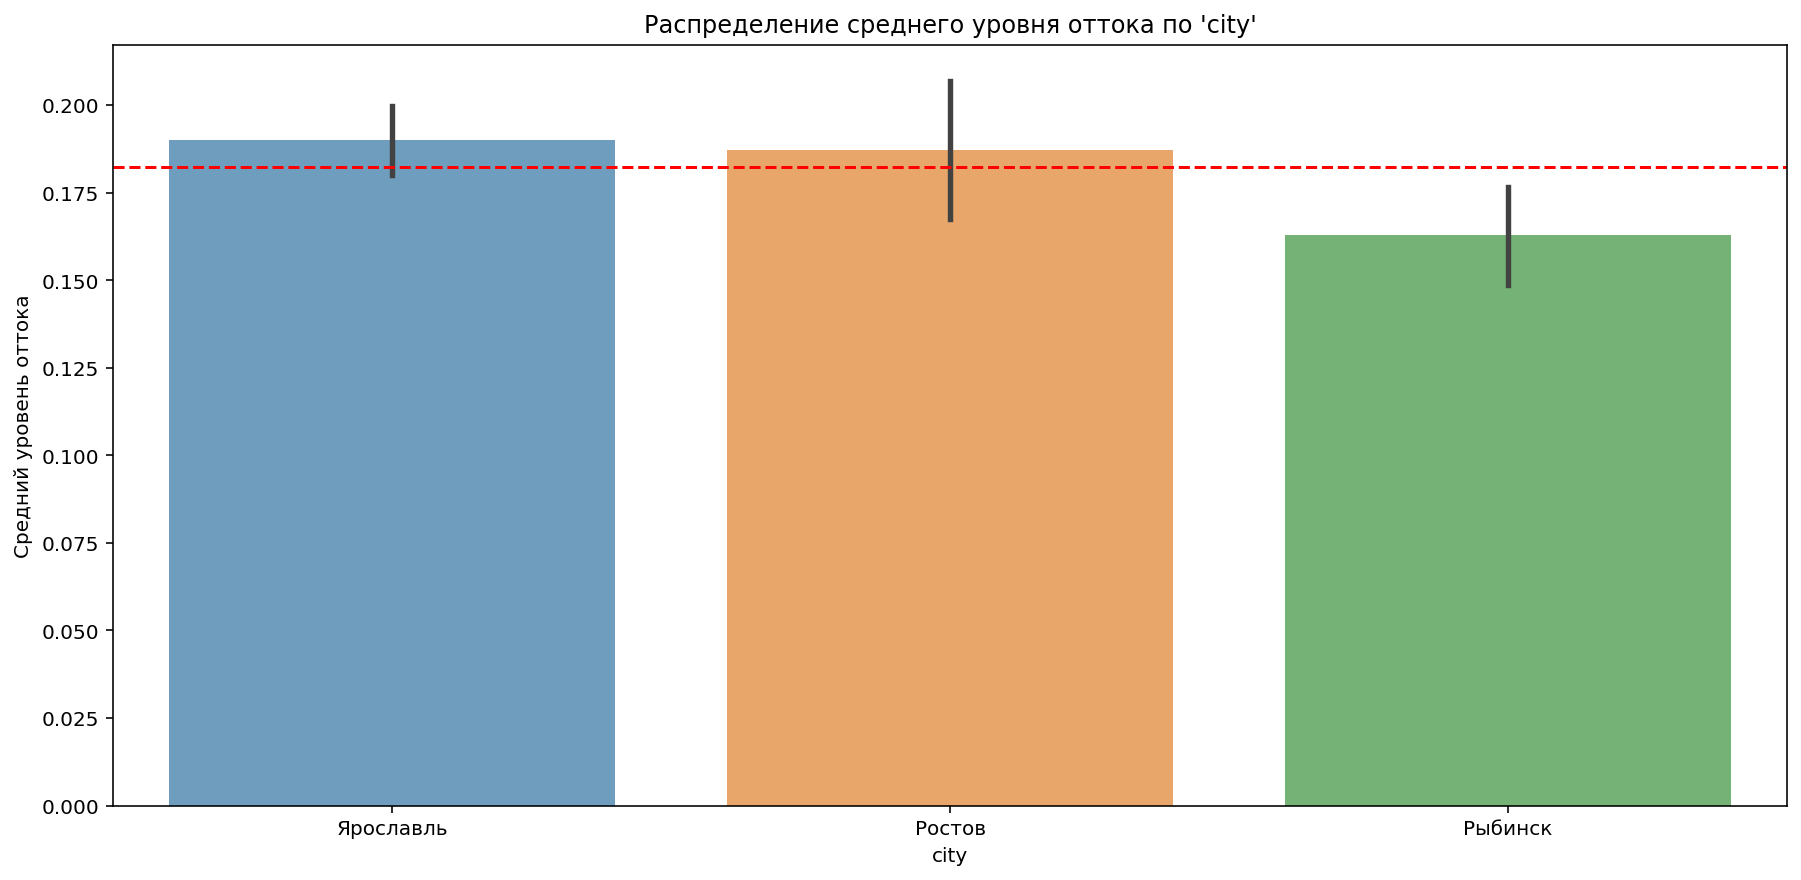

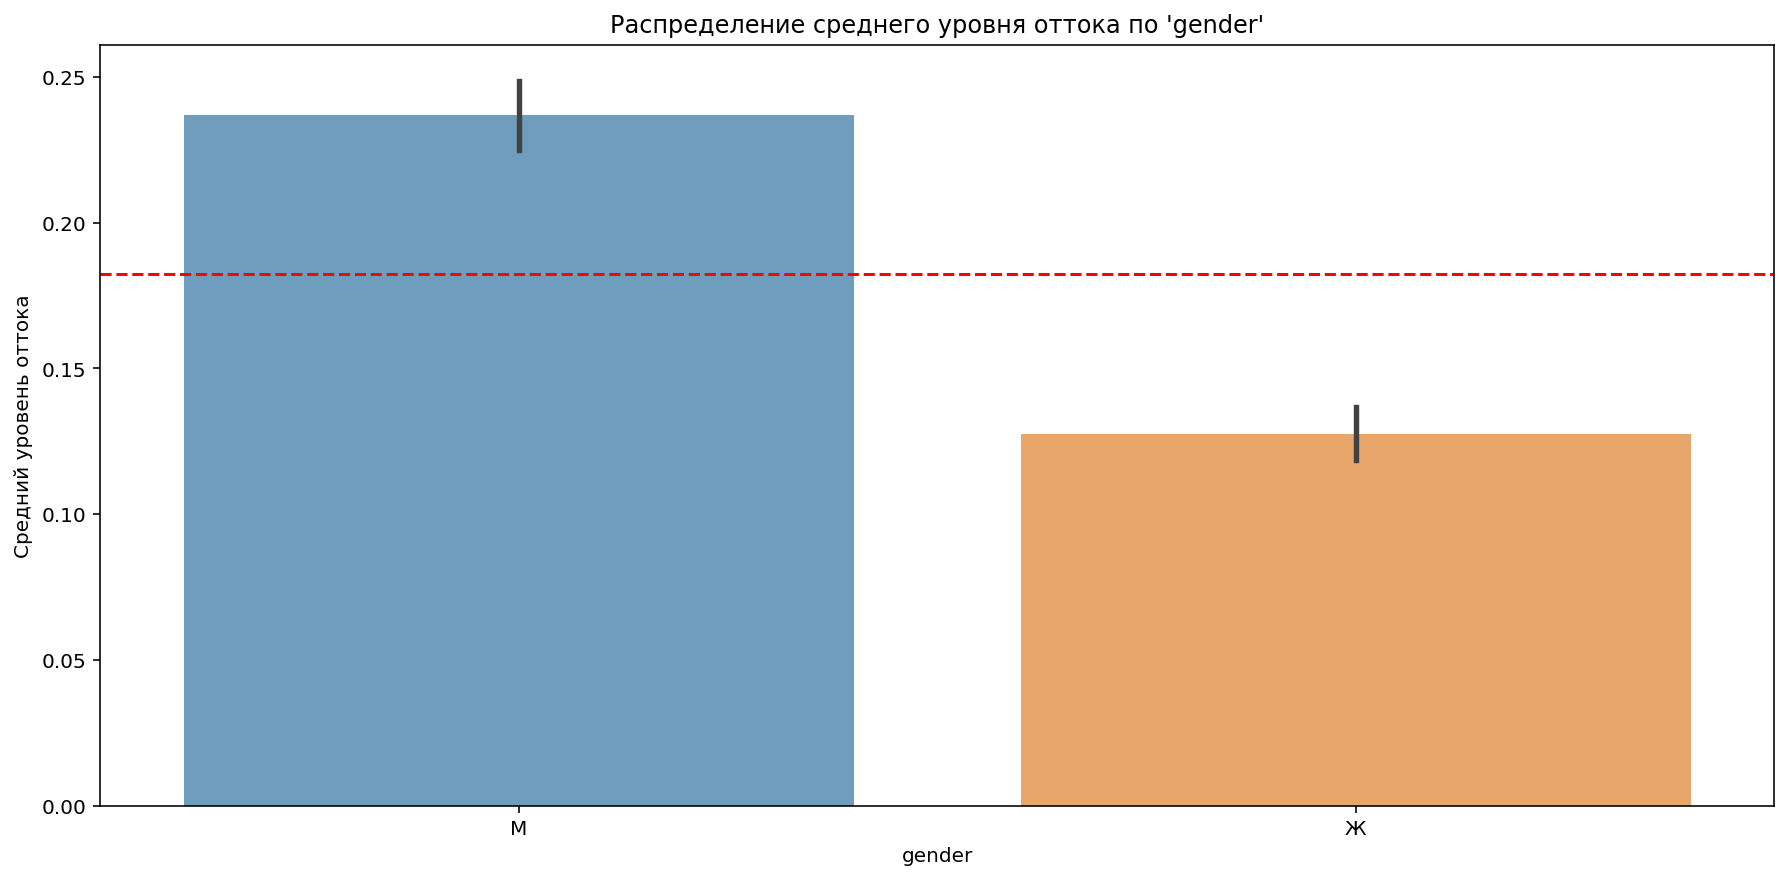

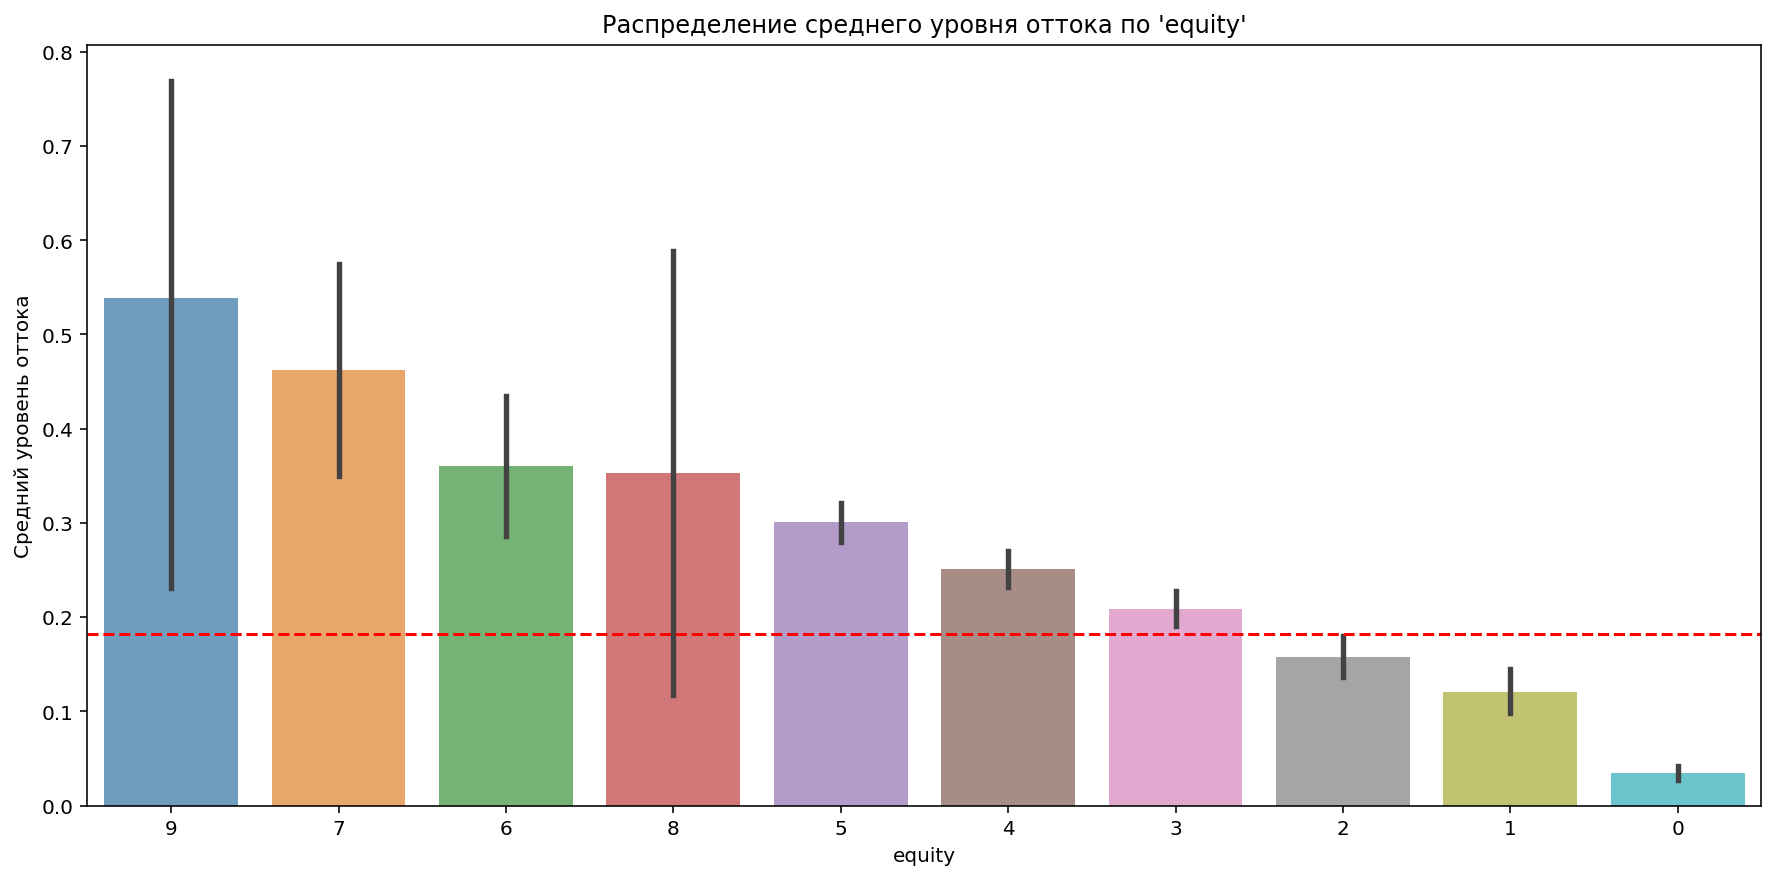

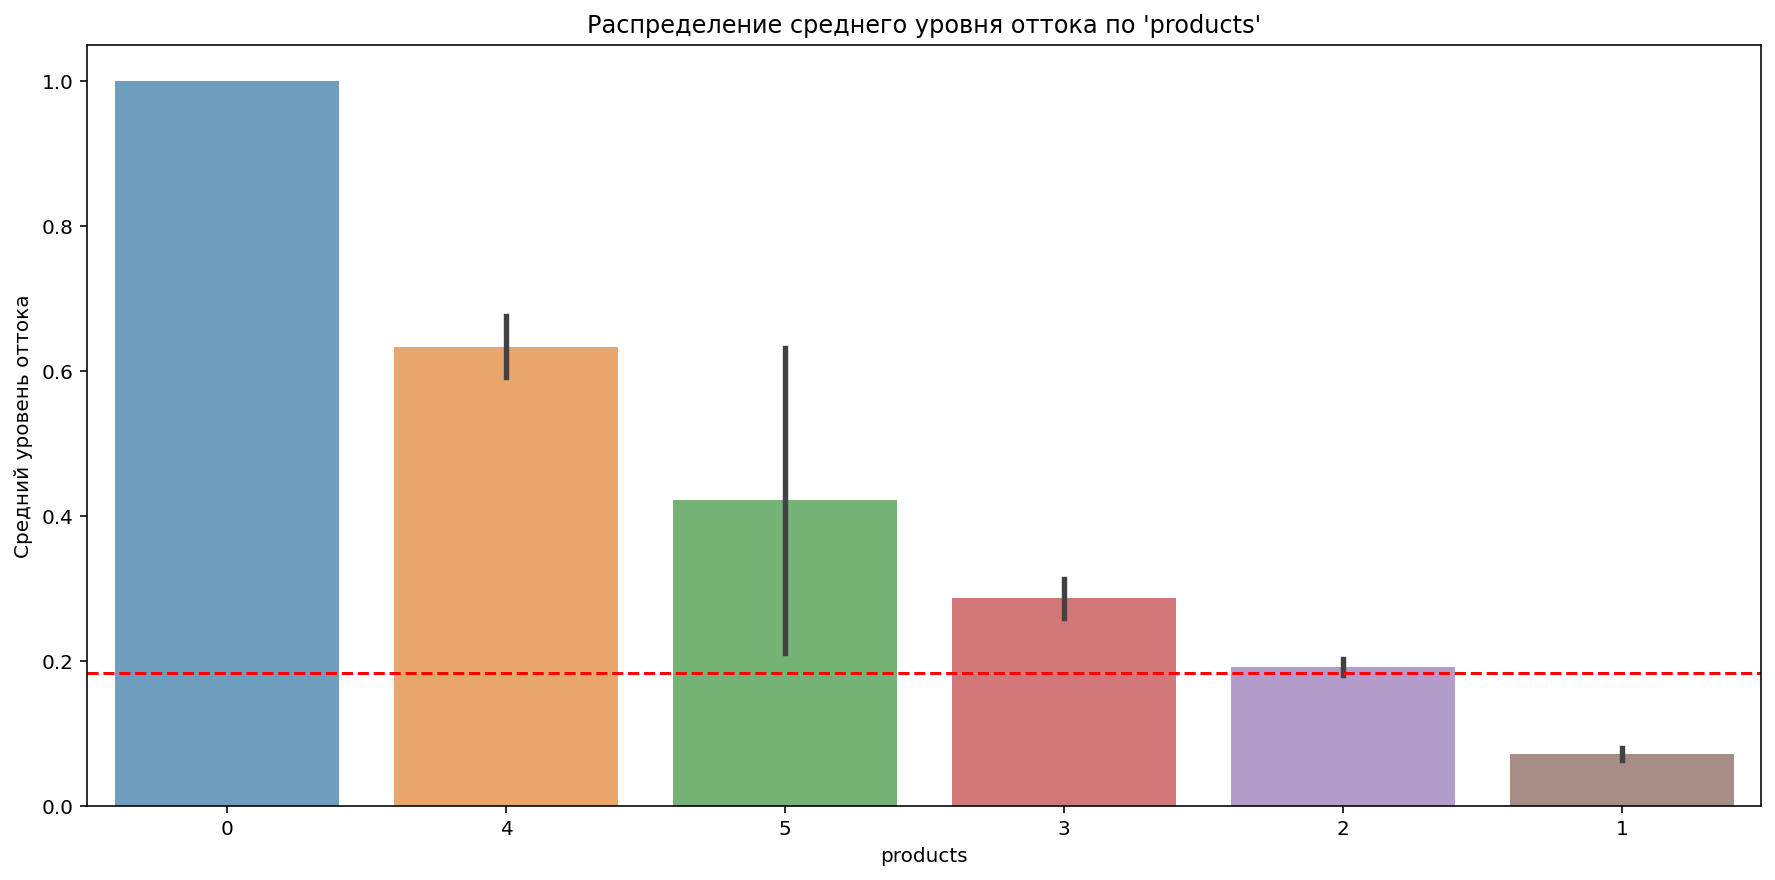

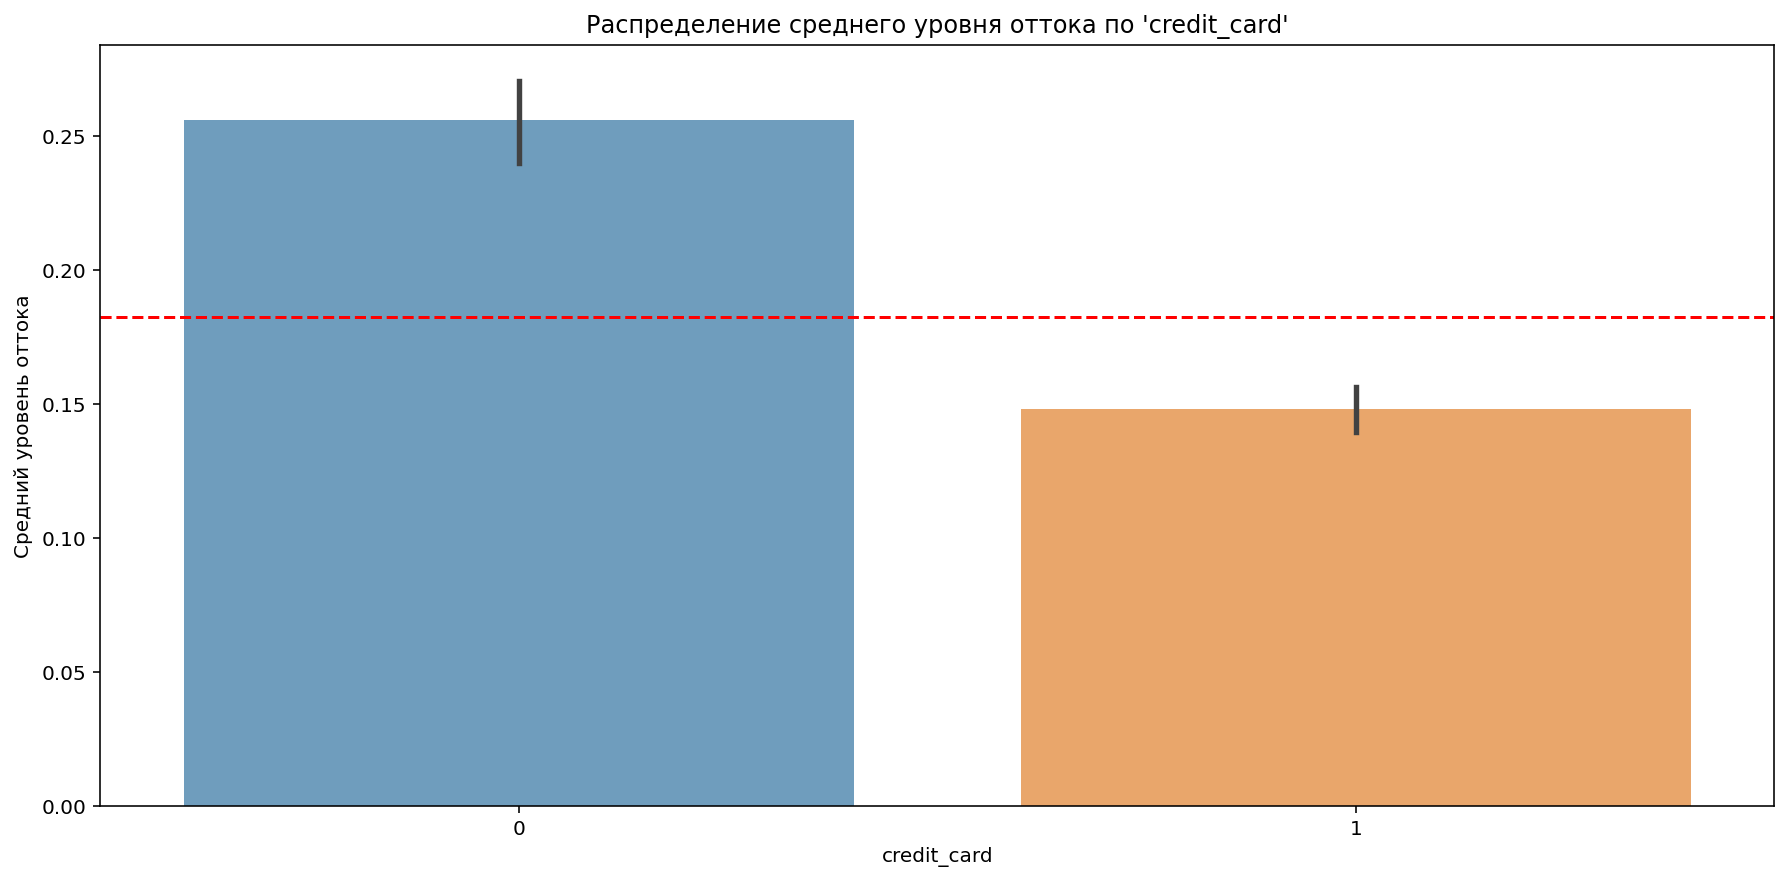

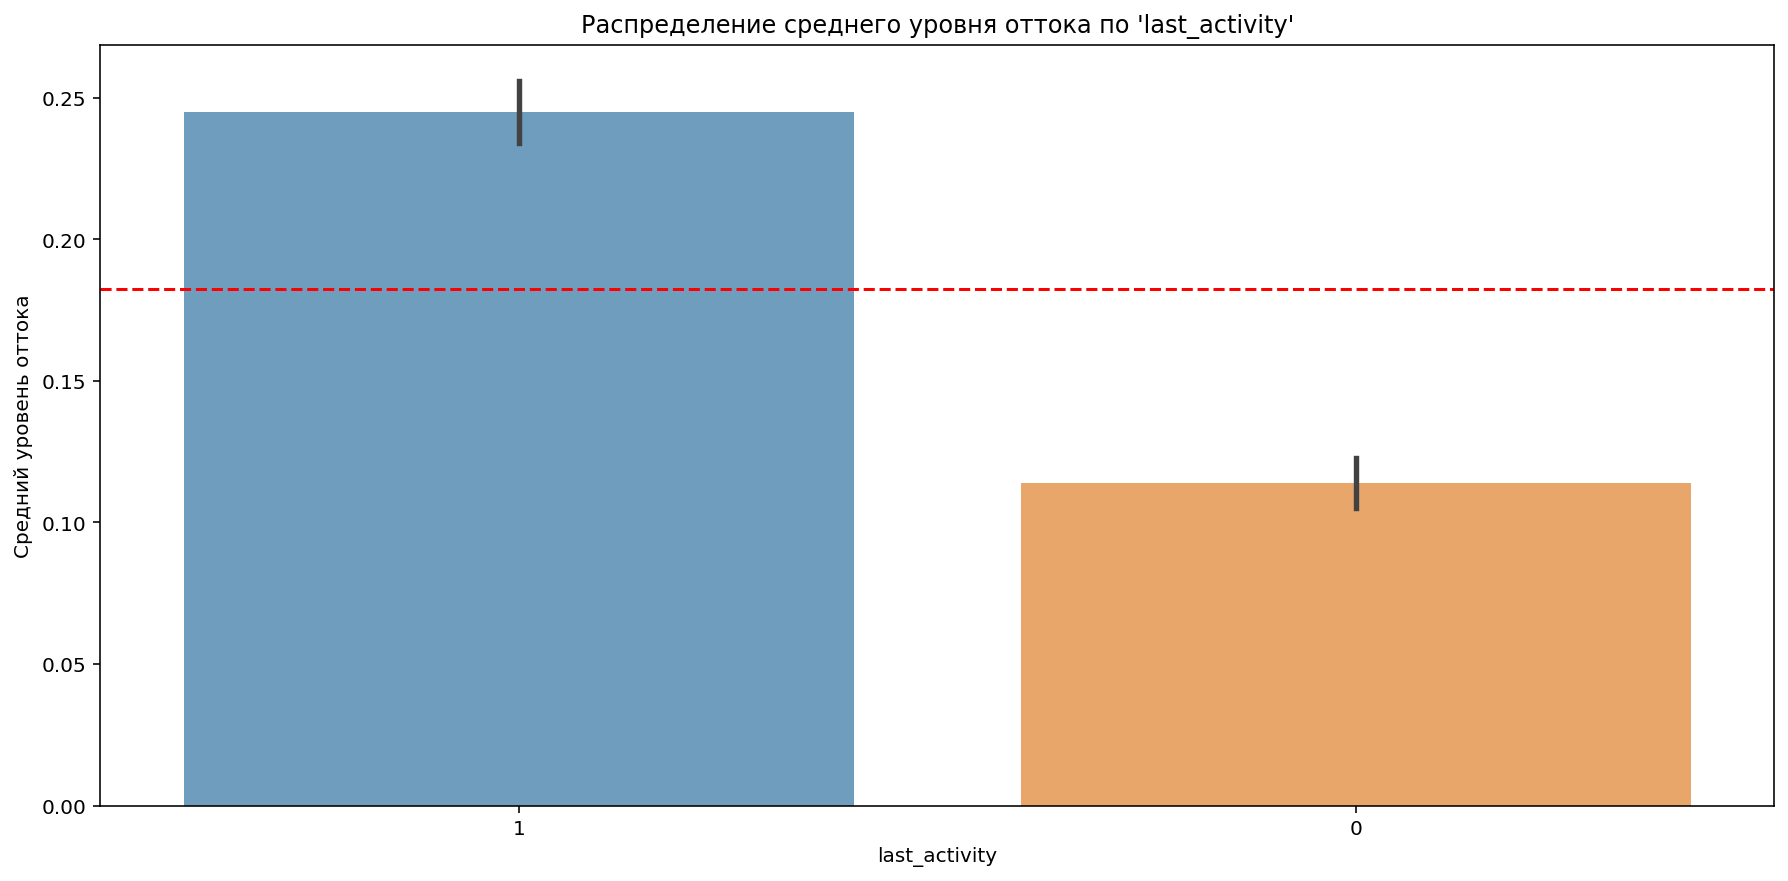

In [32]:
graph_kat (df, hue=None)

Уровень оттока клиентов с количеством продуктов банка равным `0` составляет `100%`, что очень подозрительно, проверим количество клиентов и клиентов в оттоке с этим парамметром.

In [33]:
print("Количество клиентов с количеством продуктов банка равным `0`:", df.query('products == 0')['user_id'].count())
print("Количество клиентов в оттоке с количеством продуктов банка равным `0`:",df.query('products == 0')['churn'].sum())

Количество клиентов с количеством продуктов банка равным `0`: 1
Количество клиентов в оттоке с количеством продуктов банка равным `0`: 1


Учитывать клиентов с количеством продуктов банка равным `0` мы не можем.

- Клиенты из Ярославля и Ростова имеют отток выше, чем по датафрейму в среднем.
- У мужчин отток выше среднего по датафрейму.
- Видно, что при количестве баллов собственности выше 2 отток клиентов высокий.
- Высокий уровень оттока показывают клиенты с 3, 4 и 5 продуктами, клиенты с двумя продуктами находяться в районе среднего оттока клиентов по датафрейму.
- Отсутствие кредитной карты также сильно влияет на отток клиентов.
- Высокий уровень оттока активных клиентов, как выяснили ранее из-за несовершенства учта данных в системе активные клиенты имеют статус ушедшего, опираться на этот показатель не стоит.

Cоздадим функции для подсчёта границ с учетом 1.5 размаха и удаления выбросов, для корректного подсчета корреляции

In [34]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    dataq = data.loc[(data[column] < q3 + 1.5*iqr) & (data[column] > q1 - 1.5*iqr), column]
    return dataq

In [35]:
#создадим отдельный датафрейм для подсчета корреляции
df_clean = df
# удалим столбец user_id, он не нужен для корреляции
df_clean = df_clean.drop('user_id', axis=1)

In [36]:
# функция для удаления выбросов
def clean_vbr (data):
    for column in ['score','balance', 'est_salary', 'age']:
        data[column] = quartile_range(data, column)
# удалим выбросы
clean_vbr (df_clean)

Построим карту корреляции между признаками

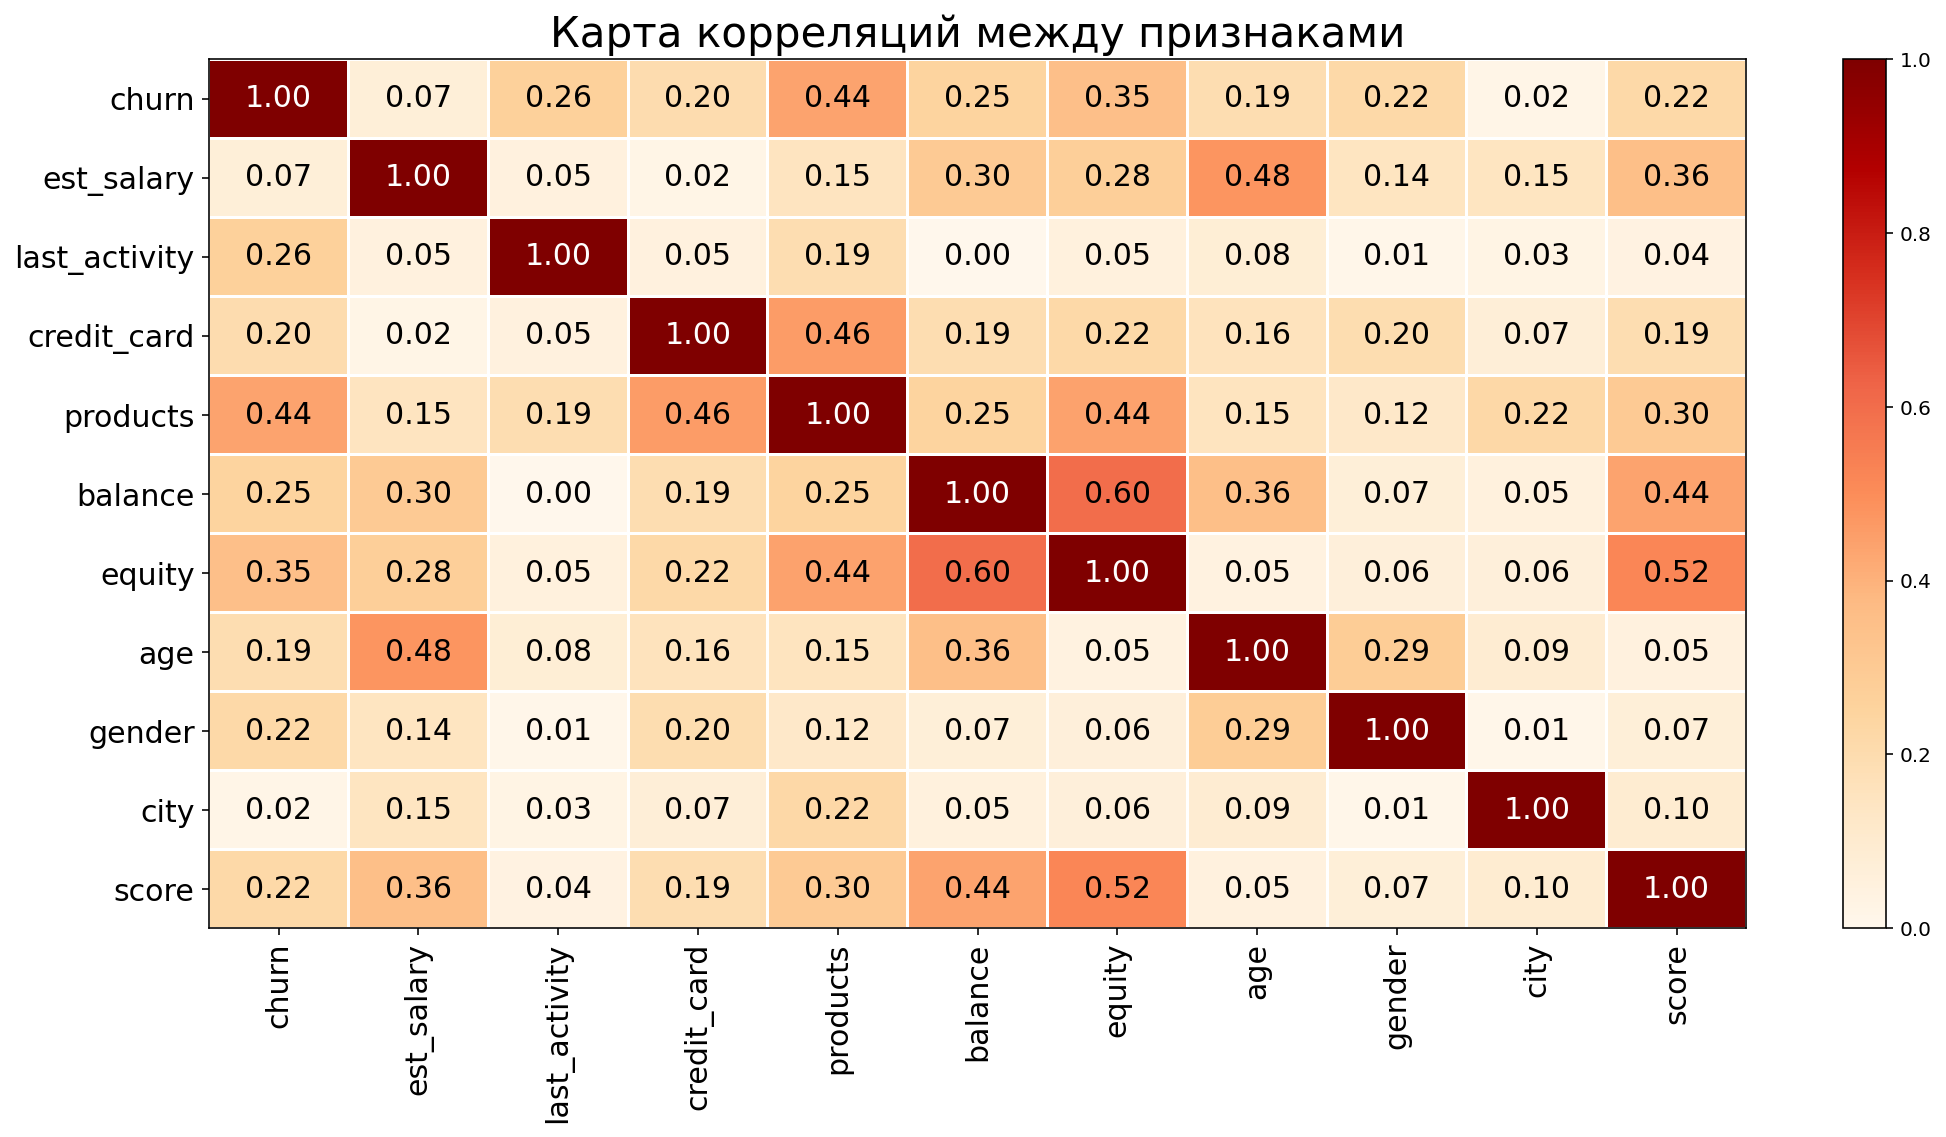

In [37]:
# создадим переменную с таблицей корреляций
phik = df_clean.phik_matrix(interval_cols=['score','balance', 'est_salary', 'age']) #указать колонки с непрерывными признаками
# визуализируем корреляционную матрицу для наглядности
plot_correlation_matrix(phik.values, 
                        x_labels=phik.columns, 
                        y_labels=phik.index, 
                        vmin=0, vmax=1, color_map="OrRd",  #указать цвет
                        title='Карта корреляций между признаками', 
                        fontsize_factor=1.5, 
                        figsize=(15, 8))
plt.tight_layout()

Cильно коррелирующие признаки отсутствуют. Умеренная взаимосвязь наблюдается между `churn - products (0.44)` и `churn - equity (0.35)`.

**Вывод**

- В разрезе балов видно, что отток клиентов выше чем их удержание на диапазоне 820-900. 
- В разрезе баланса видно, что отток клиентов выше чем их удержание от 1 000 000.
- В разрезе оценочного дохода клиента видно, что отток клиентов выше чем их удержание на диапазонах 100 000 - 140 000 и 150 000 - 220 000.
- В разрезе возраста можно выделить две группы это 25-35 лет и 50-60 лет с повышенным оттоком.
- Клиенты из Ярославля и Ростова имеют отток выше чем по датафрейму в среднем.
- У мужчин отток выше среднего по датафрейму.
- Видно, что при количестве баллов собственности выше 2 отток клиентов высокий.
- Высокий уровень оттока показывают клиенты с 3, 4 и 5 продуктами, клиенты с двумя продуктами находяться в районе среднего оттока клиентов по датафрейму.
- Отсутствие кредитной карты также сильно влияет на отток клиентов.
- Высокий уровень оттока активных клиентов, как выяснили ранее из-за несовершенства учта данных в системе активные клиенты имеют статус ушедшего, опираться на этот показатель не стоит.
- Высокий уровень оттока по возрасте можно отметить у следующих клиентов - это клиенты в возрасте 21 года, в возрасте 25-35 лет, 50-60 лет и клиенты в возрасте 79 лет.

Cильно коррелирующие признаки отсутствуют. Умеренная взаимосвязь наблюдается между `churn - products (0.44)` и `churn - equity (0.35)` и это видно на графиках где наибольшее отклонение от среднего оттоко по датафрейму.

### Проверка гипотез

**Проверим гипотезу №1:** Существует ли разница в среднем доходе заказа между между теми клиентами, которые ушли и теми, которые остались.

Подготовим и проанализируем данные:

In [38]:
# создадим датафрейм c данными о клиентах которые ушли
client_es_1 = df_clean.query('churn == 1')['est_salary']
# создадим датафрейм c данными о клиентах которые не ушли
client_es_0 = df_clean.query('churn == 0')['est_salary']

client_es_1 = client_es_1.dropna()
client_es_0 = client_es_0.dropna()

In [39]:
print('Описательная статистика по среднему доходу клиентов которые ушли')
print(client_es_1.describe())
print()
print('Описательная статистика по среднему доходу клиентов которые не ушли')
print(client_es_0.describe())
print()
print('Разница между показателями по среднему доходу для клиентов не ушедших и ушедших')
print(client_es_0.describe() - client_es_1.describe())
print()
print("Клиенты которые ушли:", client_es_1.shape[0])
print("Клиенты которые не ушли:", client_es_0.shape[0])
print(f'Разница в размерах выборок: {client_es_0.shape[0]/client_es_1.shape[0]-1:.0%}')
print(f'Различие средних значений выборок: {(client_es_0.mean() / client_es_1.mean())-1:.0%}')

Описательная статистика по среднему доходу клиентов которые ушли
count     1740
mean    128685
std      62858
min      10880
25%      81508
50%     121405
75%     168452
max     322154
Name: est_salary, dtype: float64

Описательная статистика по среднему доходу клиентов которые не ушли
count     7755
mean    122175
std      65497
min       2546
25%      71663
50%     113591
75%     164022
max     323367
Name: est_salary, dtype: float64

Разница между показателями по среднему доходу для клиентов не ушедших и ушедших
count    6015
mean    -6510
std      2640
min     -8334
25%     -9846
50%     -7814
75%     -4430
max      1212
Name: est_salary, dtype: float64

Клиенты которые ушли: 1740
Клиенты которые не ушли: 7755
Разница в размерах выборок: 346%
Различие средних значений выборок: -5%


In [40]:
print('Дисперсии выборки ушедших клиентов', round(np.var(client_es_1), 2))
print('Дисперсии выборки не ушедших клиентов', round(np.var(client_es_0), 2))
print('Отношение большей дисперсии выборки к меньшей дисперсии выборки составляет', 
      round(np.var(client_es_0) / np.var(client_es_1), 2))

Дисперсии выборки ушедших клиентов 3948814860.97
Дисперсии выборки не ушедших клиентов 4289360472.25
Отношение большей дисперсии выборки к меньшей дисперсии выборки составляет 1.09


- Отношение большей дисперсии выборки к меньшей дисперсии выборки составляет `1.09` , что меньше 4. Это означает, что мы можем предположить, что дисперсии генеральной совокупности равны.
- Большая разница в выборках, необходимо будет учесть этот момент при проведении теста.

Построим графики распределения оценочного дохода для ушедших и не ушедших клиентов 

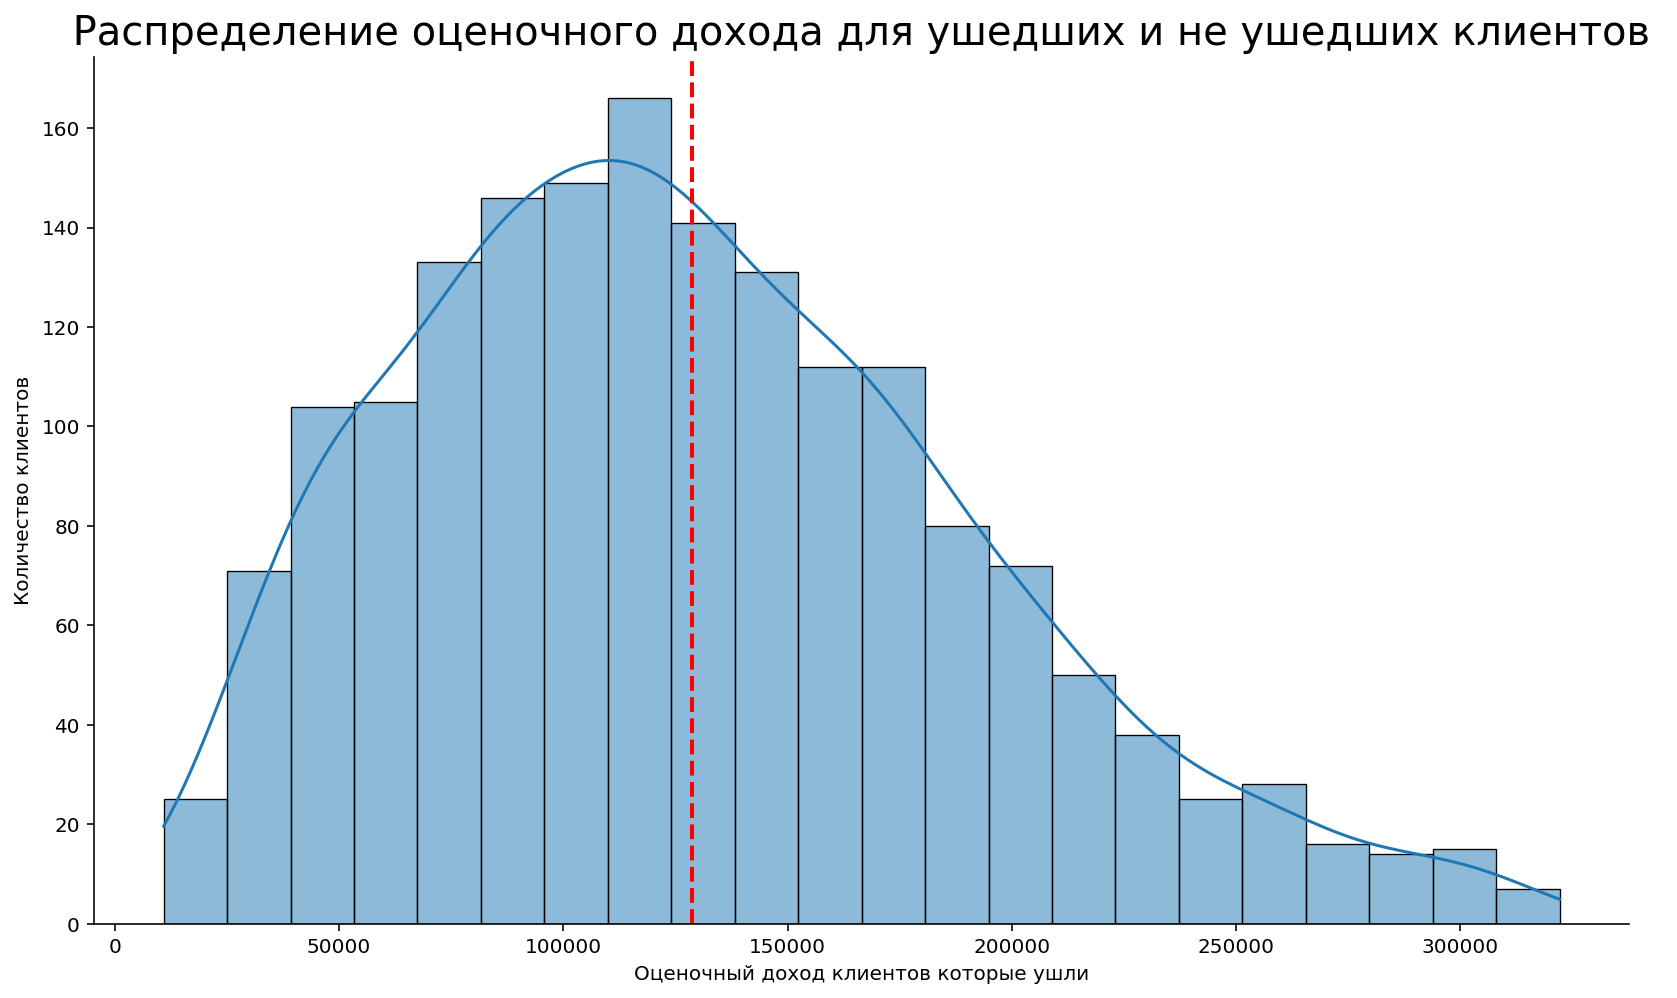

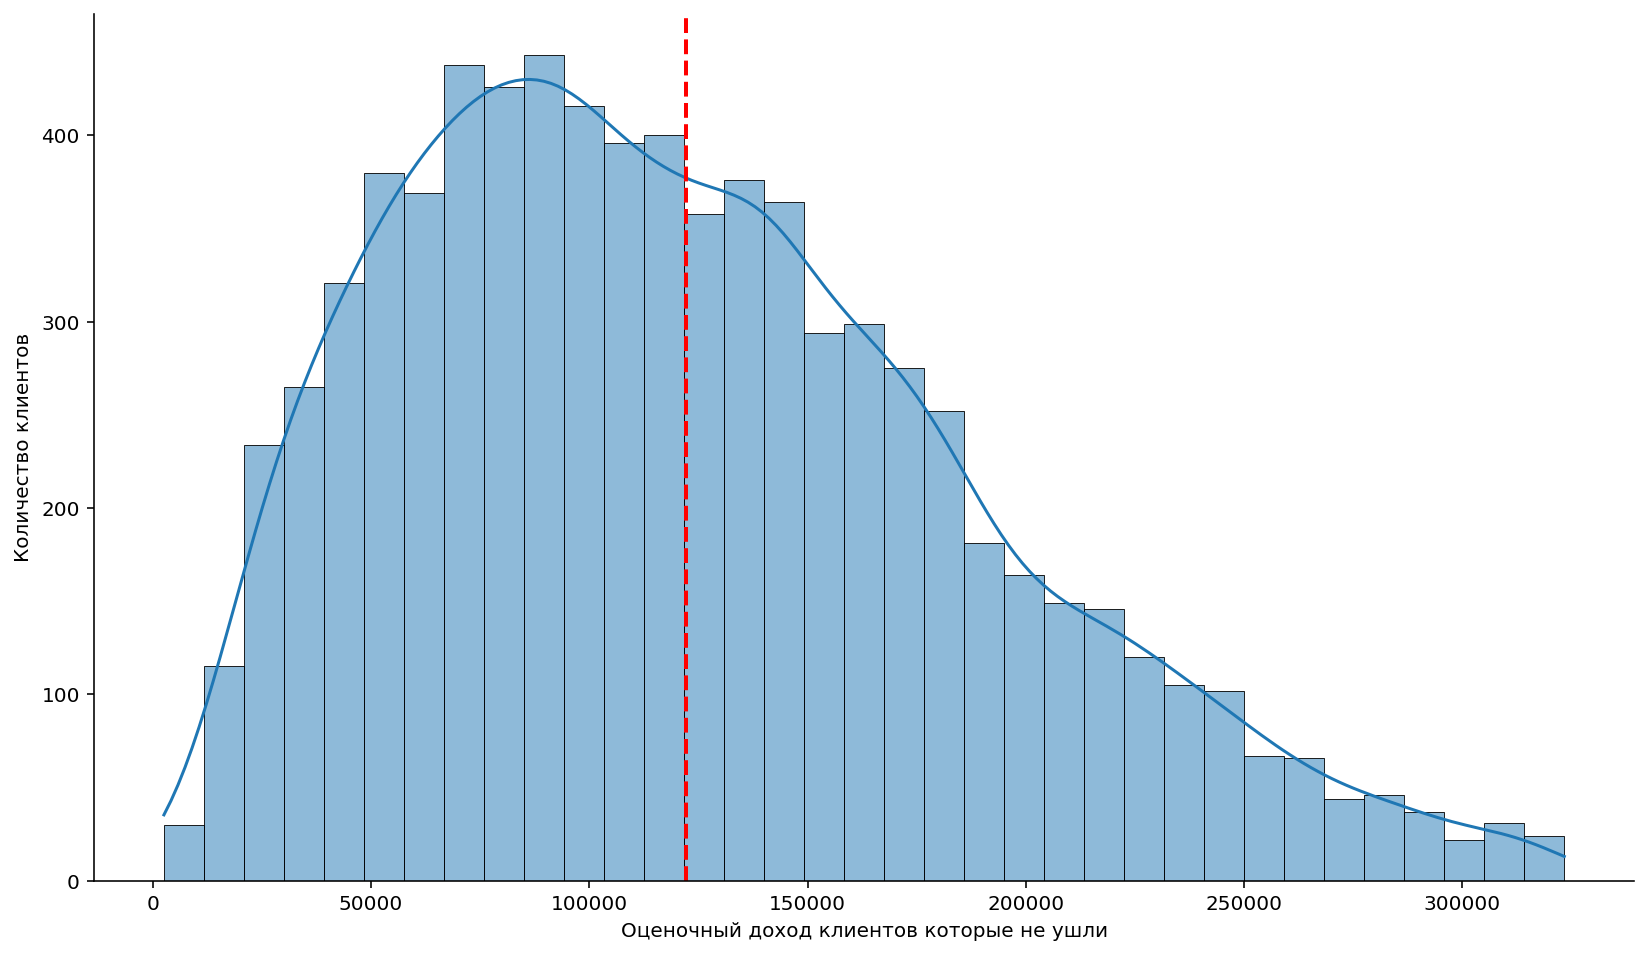

In [41]:
mean = np.mean(client_es_1)
sns.displot(data= client_es_1,
     kde=True, height=3, facet_kws=dict(margin_titles=True)
).set(xlabel="Оценочный доход клиентов которые ушли", ylabel="Количество клиентов")
# нанесем линию среднего оценочного дохода
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.gcf().set_size_inches(15, 8)
plt.title(' Распределение оценочного дохода для ушедших и не ушедших клиентов ', fontsize=20)

mean = np.mean(client_es_0)
sns.displot(data= client_es_0,
     kde=True, height=3, facet_kws=dict(margin_titles=True)
).set(xlabel="Оценочный доход клиентов которые не ушли", ylabel="Количество клиентов")
# нанесем линию среднего оценочного дохода
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.gcf().set_size_inches(15, 8);

Распределение можно считать нормальным и оно схоже между графиками, но имеется правый хвост из-за чего среднее смещенно на обоих графиках правее от шапки графика.

У нас имеются две независимые выборки, гипотезу нам необходимо проверить о равенстве средних двух генеральных совокупностей поэтому метод выберем `ttest_ind` с аргументом `equal_var=False` так как огромная разница в выборках, также будем проверять двусторонюю гипотезу, так как нам необходимо проверить есть разница между средними доходами для ушедших и не ушедших клиентов и нам не важно в какую сторону это смещение если оно имеется.

**Проверим гипотезу "существует ли разница в среднем доходе заказа между между теми клиентами, которые ушли и теми, которые остались?"**

Составим гипотезы:
- `HO`: Средний доход оставшихся и ушедших клиентов одинаковые.
- `H1`: Средний доход оставшихся и ушедших клиентов разные.

In [42]:
# выбранный уровень статистической значимости
alpha = 0.01

results = st.ttest_ind(client_es_1, client_es_0, equal_var=False)

# выведем средний доход для обоих категорий клиентов
print('Средний доход клиентов которые ушли:', round(client_es_1.mean(), 2))
print('Средний доход клиентов которые не ушли:', round(client_es_0.mean(), 2))
print()
# выведем полученное p-value
print('p-значение', results.pvalue)
print()
# вывод об отвержении или неотвержении нулевой гипотезе
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотизу ')
else:
    print('Не отвергаем нулевую')

Средний доход клиентов которые ушли: 128684.77
Средний доход клиентов которые не ушли: 122174.69

p-значение 0.00010965029731030963

Отвергаем нулевую гипотизу 


Не получилось отвергнуть гипотезу о том, что средний доход оставшихся и ушедших клиентов одинаковые. 

**Проверим гипотезу №2:** Существует ли разница в доле не держателей кредитных карт среди ушедших и не ушедших клиентов.

Подготовим и проанализируем данные:

In [43]:
# число пользователей по категориям
n_users = np.array([df.loc[df["churn"] == 1, 'user_id'].nunique(), 
                        df.loc[df["churn"] == 0, 'user_id'].nunique()])
# число пользователей, совершивших событие в категориях
success = np.array([df.loc[(df["credit_card"] == 0) & (df["churn"] == 1), 'user_id'].nunique(), 
                        df.loc[(df["credit_card"] == 0) & (df["churn"] == 0), 'user_id'].nunique()])


# выведем доли
print(f"Доля ушедших клиентов без кредитных карт {success[0]/n_users[0]:.3}")
print(f"Доля не ушедших клиентов без кредитных карт {success[1]/n_users[1]:.3}")

Доля ушедших клиентов без кредитных карт 0.449
Доля не ушедших клиентов без кредитных карт 0.291


Для проверки уровня статистической значимости будем применять Z-критерий, так как переменная бинарная - доля не держателей кредитных карт среди ушедших и не ушедших клиентов.

**Проверим гипотезу "Существует ли разница в доле не держателей кредитных карт среди ушедших и не ушедших клиентов?"**

Составим гипотезы:
- `HO`: Доли не держателей кредитных карт среди ушедших и не ушедших клиентов одинаковые.
- `H1`: Доли не держателей кредитных карт среди ушедших и не ушедших клиентов разные.

In [44]:
# критический уровень статистической значимости
alpha = 0.05

# пропорции успехов в группах:
p1 = success[0]/n_users[0]
p2 = success[1]/n_users[1]
    
# пропорция успехов в комбинированном датасете:
p_combined = (success[0] + success[1]) / (n_users[0] + n_users[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference /  np.sqrt(p_combined * (1 - p_combined) * (1/n_users[0] + 1/n_users[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2   #тест двусторонний, удваиваем результат
    
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть разница')
else:
     print('Не получилось отвергнуть нулевую гипотезу, доли одинаковые')

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть разница


Получилось отвергнуть гипотезу, между долями не держателей кредитных карт среди ушедших и не ушедших клиентов разные.

**Вывод**

Мы проверили две гипотезы:
   - **Гипотеза №1:** Существует ли разница в среднем доходе заказа между между теми клиентами, которые ушли и теми, которые остались?
           * Вывод: средний доход оставшихся и ушедших клиентов одинаковые.
   - **Гипотеза №2:** Существует ли разница в доле не держателей кредитных карт среди ушедших и не ушедших клиентов?
           * Вывод: доли не держателей кредитных карт среди ушедших и не ушедших клиентов разные.
           * доля ушедших клиентов без кредитных карт составляет `45%`.

### Подведение промежуточных итогов

Для создания портрета клиента с высоким оттоком и дальнейшего их сегментировния выделим основные признаки с высоким оттоком:

   - В разрезе балов видно, что отток клиентов выше чем их удержание на диапазоне 820-900. 
   - В разрезе баланса видно, что отток клиентов выше чем их удержание от 1 000 000.
   - В разрезе возраста можно выделить две группы это 25-35 лет и 50-60 лет с повышенным оттоком.
   - Клиенты из Ярославля и Ростова имеют отток выше, чем по датафрейму в среднем.
   - У мужчин отток выше среднего по датафрейму.
   - Видно, что при количестве баллов собственности выше 2 отток клиентов высокий, стоит отметить среднюю корреляцию с оттоком.
   - Высокий уровень оттока показывают клиенты с 3, 4 и 5 продуктами, клиенты с двумя продуктами находятся в районе среднего оттока клиентов по датафрейму, стоит отметить среднюю корреляцию с оттоком.
   - Отсутствие кредитной карты также сильно влияет на отток клиентов.
   - Высокий уровень оттока активных клиентов, как выяснили ранее из-за несовершенства учта данных в системе активные клиенты имеют статус ушедшего, опираться на этот показатель не стоит.
   - Отсутствие кредитной карты также сильно влияет на отток клиентов, также проверка гипотезы подтвердила, что доли не держателей кредитных карт среди ушедших и не ушедших клиентов разные и составляет `45%`.
   

### Сегментирование клиентов

Сегментацию мы будем проводить по результатам EDA, корреляции и гипотез, в каждом сегменте мы будет использовать по три признака с высоким оттоком клиентов, каждый сегмент будет включать не менее 500 клиентов, создадим три сегмента по условиям выше указанных.

**Сегмент 1:**
   - клиенты в возрасте 25-35 лет;
   - клиенты не имеют кредитной карты;
   - клиенты имеют 3-5 продуктов банка.

**Сегмент 2:**
   - у клентов баллы кредитного скоринга 820-900;
   - клиенты не имеют кредитной карты;
   - клиенты имеющие баллы собственности 9 и 7.

   **Сегмент 3:**
   - клиенты в возрасте 50-60 лет;
   - клиенты активные;
   - клиенты имеющие баллы собственности 5, 6 и 8.

In [45]:
# сделаем срез по сформированным условиям
segment_1 = df.query('25 <= age <= 35 and credit_card == 0 and ~(1 <= products <= 2 and products == 0) ')
segment_2 = df.query('820 <= score <= 900 and credit_card == 0 and ~(1 <= equity <= 7 and equity == 8)')
segment_3 = df.query('50 <= age <= 60 and last_activity == 1 and ~(1 <= equity <= 4 and equity == 7 and equity == 9)')

In [46]:
# создадим функцию по выводу необходимой информации по сегменту
def segment(segment):
    print(f"Количество клиентов в сегменте:", segment['user_id'].count())
    print("Количество клиентов в оттоке:", segment['churn'].sum())
    print("Уровень оттока в сегменте:", round((segment['churn'].sum()/segment['user_id'].count())*100,2),'%')
    print("Уровень оттока по датафрейму:", round((df['churn'].sum()/df['user_id'].count())*100,2),'%')  

Выведем данные по созданным сегментам.

In [47]:
print("Сегмент 1:\n   - клиенты в возрасте 25-35 лет;\n   - клиенты не имеют кредитной карты;\n   - клиенты имеют 3-5 продуктов банка.")
print()
segment(segment_1)

print()
print("Сегмент 2:\n   - у клентов баллы кредитного скоринга 820-900;")
print('   - клиенты не имеют кредитной карты;\n   - клиенты имеющие баллы собственности 9 и 7.')
print('')
segment(segment_2)

print()
print("Сегмент 3:\n   - клиенты в возрасте 50-60 лет;")
print('   - клиенты активные;\n   - клиенты имеющие баллы собственности 5, 6 и 8.')
print('')
segment(segment_3)

Сегмент 1:
   - клиенты в возрасте 25-35 лет;
   - клиенты не имеют кредитной карты;
   - клиенты имеют 3-5 продуктов банка.

Количество клиентов в сегменте: 827
Количество клиентов в оттоке: 295
Уровень оттока в сегменте: 35.67 %
Уровень оттока по датафрейму: 18.24 %

Сегмент 2:
   - у клентов баллы кредитного скоринга 820-900;
   - клиенты не имеют кредитной карты;
   - клиенты имеющие баллы собственности 9 и 7.

Количество клиентов в сегменте: 1566
Количество клиентов в оттоке: 489
Уровень оттока в сегменте: 31.23 %
Уровень оттока по датафрейму: 18.24 %

Сегмент 3:
   - клиенты в возрасте 50-60 лет;
   - клиенты активные;
   - клиенты имеющие баллы собственности 5, 6 и 8.

Количество клиентов в сегменте: 920
Количество клиентов в оттоке: 300
Уровень оттока в сегменте: 32.61 %
Уровень оттока по датафрейму: 18.24 %


### Приоритизация сегментов

С учетом ограниченных возможностей отдела маркетинга с целью сосредоточения ресурсов и усилий на наиболее перспективных и прибыльных клиентах, а также с учетом уровня оттока клиентов с сегмента приоритизируем сегменты по уровню значимости следующим образом:
1. **Сегмент 1:**
   - клиенты в возрасте 25-35 лет;
   - клиенты не имеют кредитной карты;
   - клиенты имеют 3-5 продуктов банка.
**Уровень оттока в сегменте: 35.67 %**
        
        Молодые и перспективные клиенты с заделом на будущий рост прибыли, также пользующиеся продуктами банка.
2. **Сегмент 2:**
   - у клентов баллы кредитного скоринга 820-900;
   - клиенты не имеют кредитной карты;
   - клиенты имеющие баллы собственности 9 и 7.
**Уровень оттока в сегменте: 31.23 %**
       
       Клиенты с хорошим баллом кредитного скорринга, значит можно считать надежными, большое количество собственности, значит можно сделать вывод о материальном благополучии, также самая большая доля клиентов среди других сегментов.
3. **Сегмент 3:**
   - клиенты в возрасте 50-60 лет;
   - клиенты активные;
   - клиенты имеющие баллы собственности 5, 6 и 8.
**Уровень оттока в сегменте: 32.61 %**
        
        Клиенты в возрасте, за счет чего и уступили сегменту 2, хоть и имеют уровень оттока клиентов выше, клиенты активные и имеют хорошие балы собственности.

### Общий вывод и рекомендации

**В результате проведенного анализа выявлены следующие закономерности:**

   - В разрезе балов видно, что отток клиентов выше чем их удержание на диапазоне 820-900. 
   - В разрезе баланса видно, что отток клиентов выше чем их удержание от 1 000 000.
   - В разрезе возраста можно выделить две группы это 25-35 лет и 50-60 лет с повышенным оттоком.
   - Клиенты из Ярославля и Ростова имеют отток выше чем по датафрейму в среднем.
   - У мужчин отток выше среднего по датафрейму.
   - Видно, что при количестве баллов собственности выше 2 отток клиентов высокий, стоит отметить среднюю корреляцию с оттоком.
   - Высокий уровень оттока показывают клиенты с 3, 4 и 5 продуктами, клиенты с двумя продуктами находяться в районе среднего оттока клиентов по датафрейму, стоит отметить среднюю корреляцию с оттоком.
   - Отсутствие кредитной карты также сильно влияет на отток клиентов.
   - Высокий уровень оттока активных клиентов, как выяснили ранее из-за несовершенства учта данных в системе активные клиенты имеют статус ушедшего, опираться на этот показатель не стоит.
   - Отсутствие кредитной карты также сильно влияет на отток клиентов, также проверка гипотезы подтвердила, что доли не держателей кредитных карт среди ушедших и не ушедших клиентов разные и составляет `45%`.

**Сегментировали клиентов и приоритизировали их:**

1. **Сегмент 1:**
   - клиенты в возрасте 25-35 лет;
   - клиенты не имеют кредитной карты;
   - клиенты имеют 3-5 продуктов банка.
**Уровень оттока в сегменте: 35.67 %**
        
        Молодые и перспективные клиенты с заделом на будущий рост прибыли, также пользующиеся продуктами банка.
2. **Сегмент 2:**
   - у клентов баллы кредитного скоринга 820-900;
   - клиенты не имеют кредитной карты;
   - клиенты имеющие баллы собственности 9 и 7.
**Уровень оттока в сегменте: 31.23 %**
       
       Клиенты с хорошим баллом кредитного скорринга, значит можно считать надежными, большое количество собственности, значит можно сделать вывод о материальном благополучии, также самая большая доля клиентов среди других сегментов.
3. **Сегмент 3:**
   - клиенты в возрасте 50-60 лет;
   - клиенты активные;
   - клиенты имеющие баллы собственности 5, 6 и 8.
**Уровень оттока в сегменте: 32.61 %**
        
        Клиенты в возрасте, за счет чего и уступили сегменту 2, хоть и имеют уровень оттока клиентов выше, клиенты активные и имеют хорошие балы собственности.

**Рекомендации:**

* Провести работу по увеличению доли клиентов с кредитными картами
* Выяснить, почему с увеличением числа продуктов увеличивается отточность
* Выяснить, почему с увеличением числа собственности увеличивается отточность
* Провести исследование активности клиентов старше 50 лет. Возможно, есть проблема в каналах коммуникации с клиентами этого возраста